In [100]:
library(FactoMineR)

## IMPORTATION DES DONNEES

In [62]:
def = read.csv('./Donnees/Statistics team 2018-2019/Defensive.csv', header = TRUE)

In [63]:
pas_complet = read.csv('./Donnees/Statistics team 2018-2019/Passing.csv', header = TRUE)

In [64]:
of = read.csv('./Donnees/Statistics team 2018-2019/Offensive.csv', header = TRUE)

## ANALYSE DE LA VARIABLE RATING

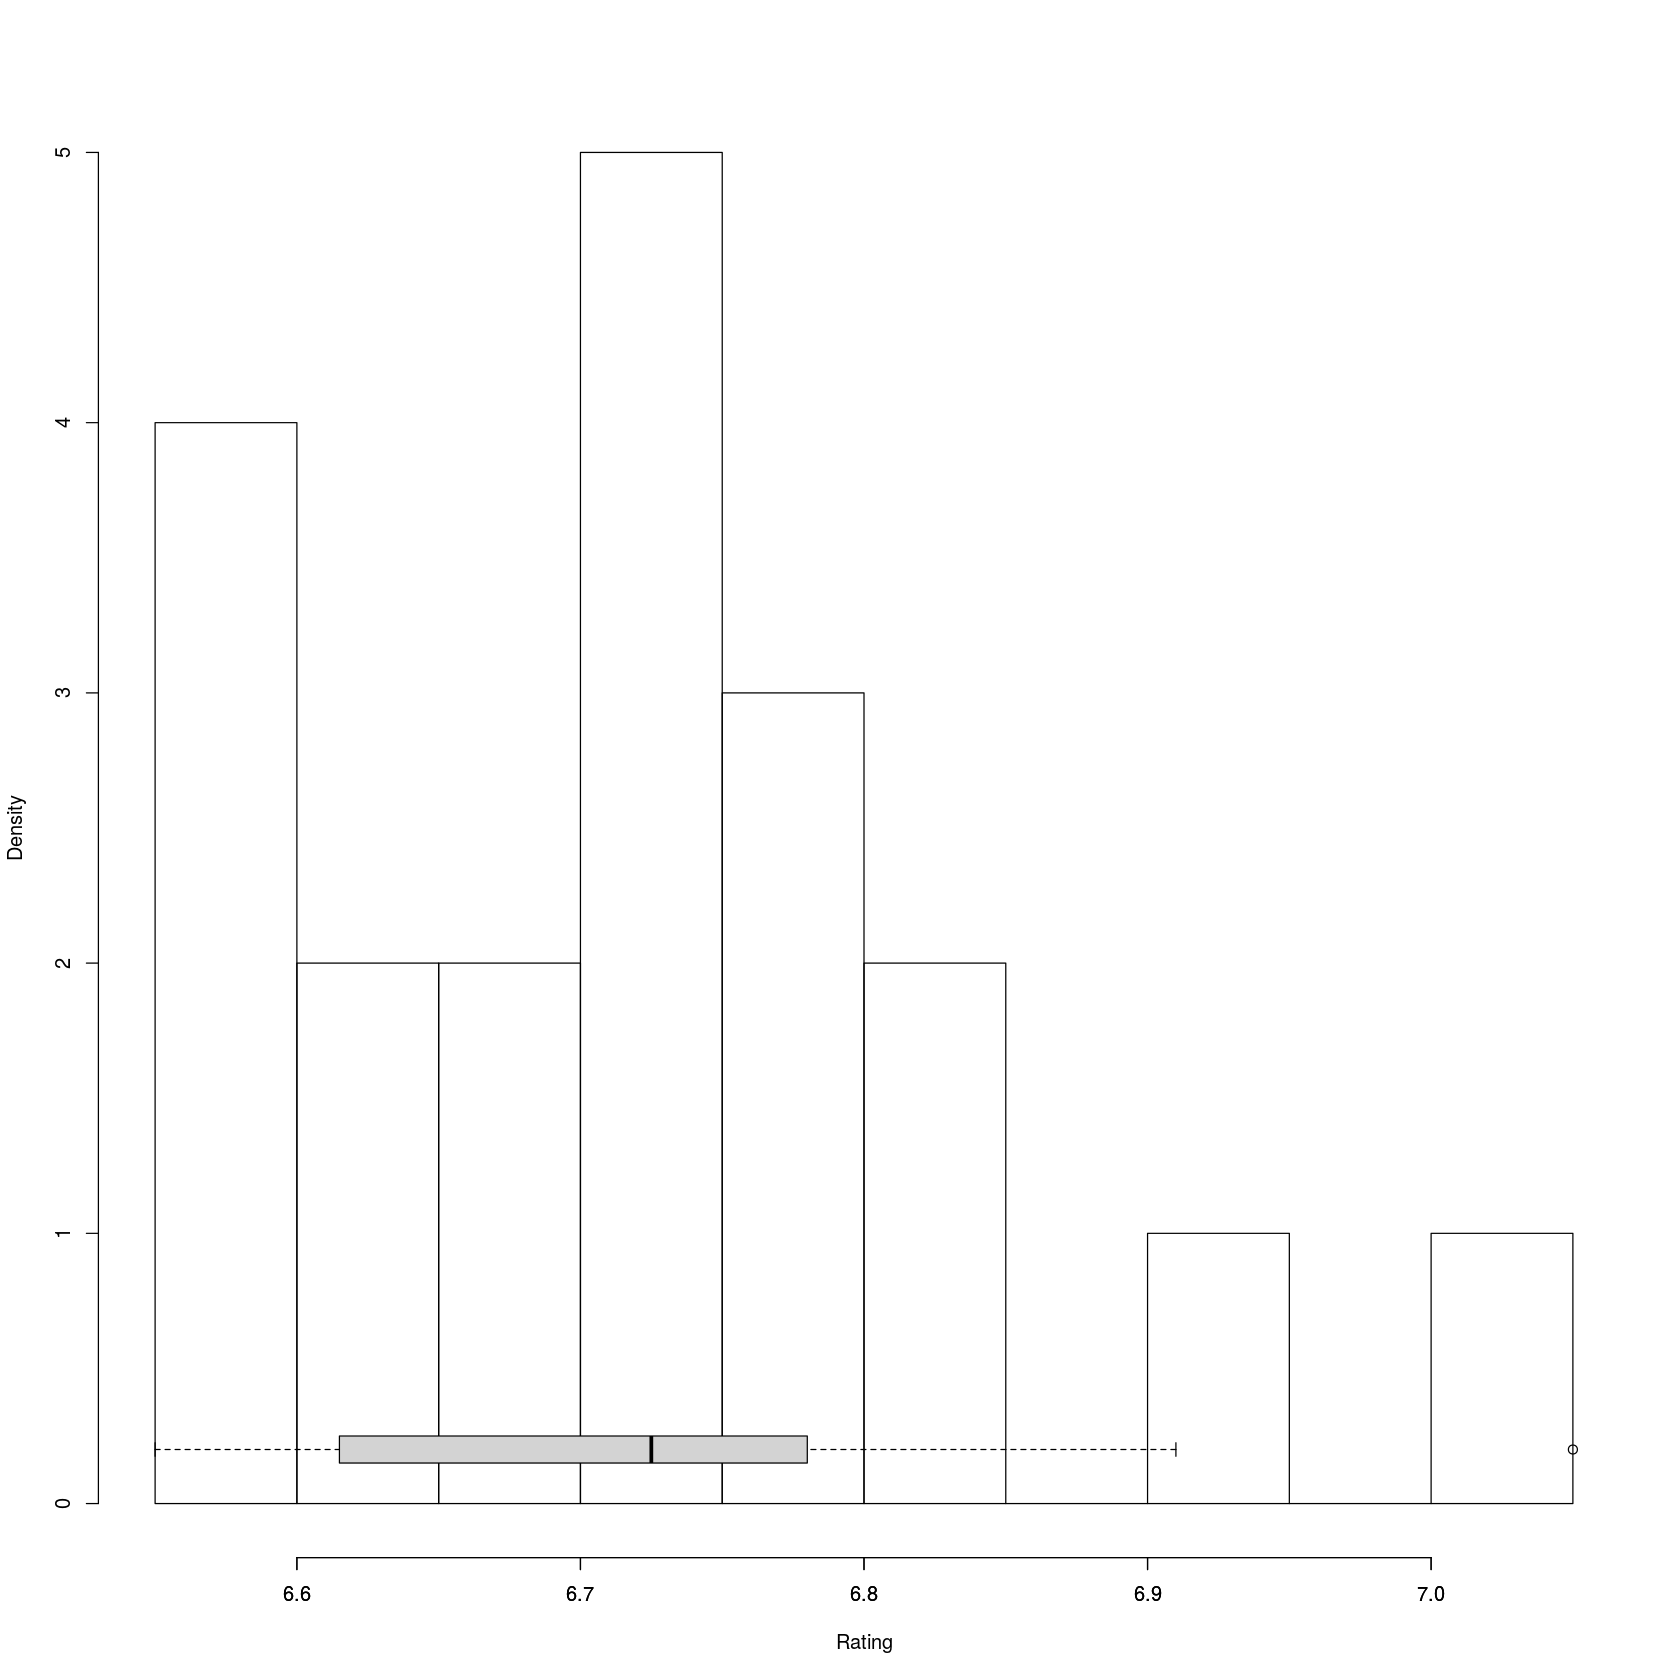

In [65]:
# Analyse descriptive de la variable Rating
options(repr.plot.width=14, repr.plot.height=14)
hist(def$Rating, breaks = 10, probability=T, main="", xlab="Rating", )
boxplot(def$Rating, horizontal=TRUE, boxwex=.2,  outline=TRUE,  
        frame=F, col = "lightgrey", add = TRUE, at=0.2)

La répartition de la variable `Rating` est légèrement asymétrique (médiane non centrée). On ne détecte qu'un seul outlier : c'est plutôt bon signe.

## ANALYSE DESCRIPTIVE DONNEES DEFENSIVE

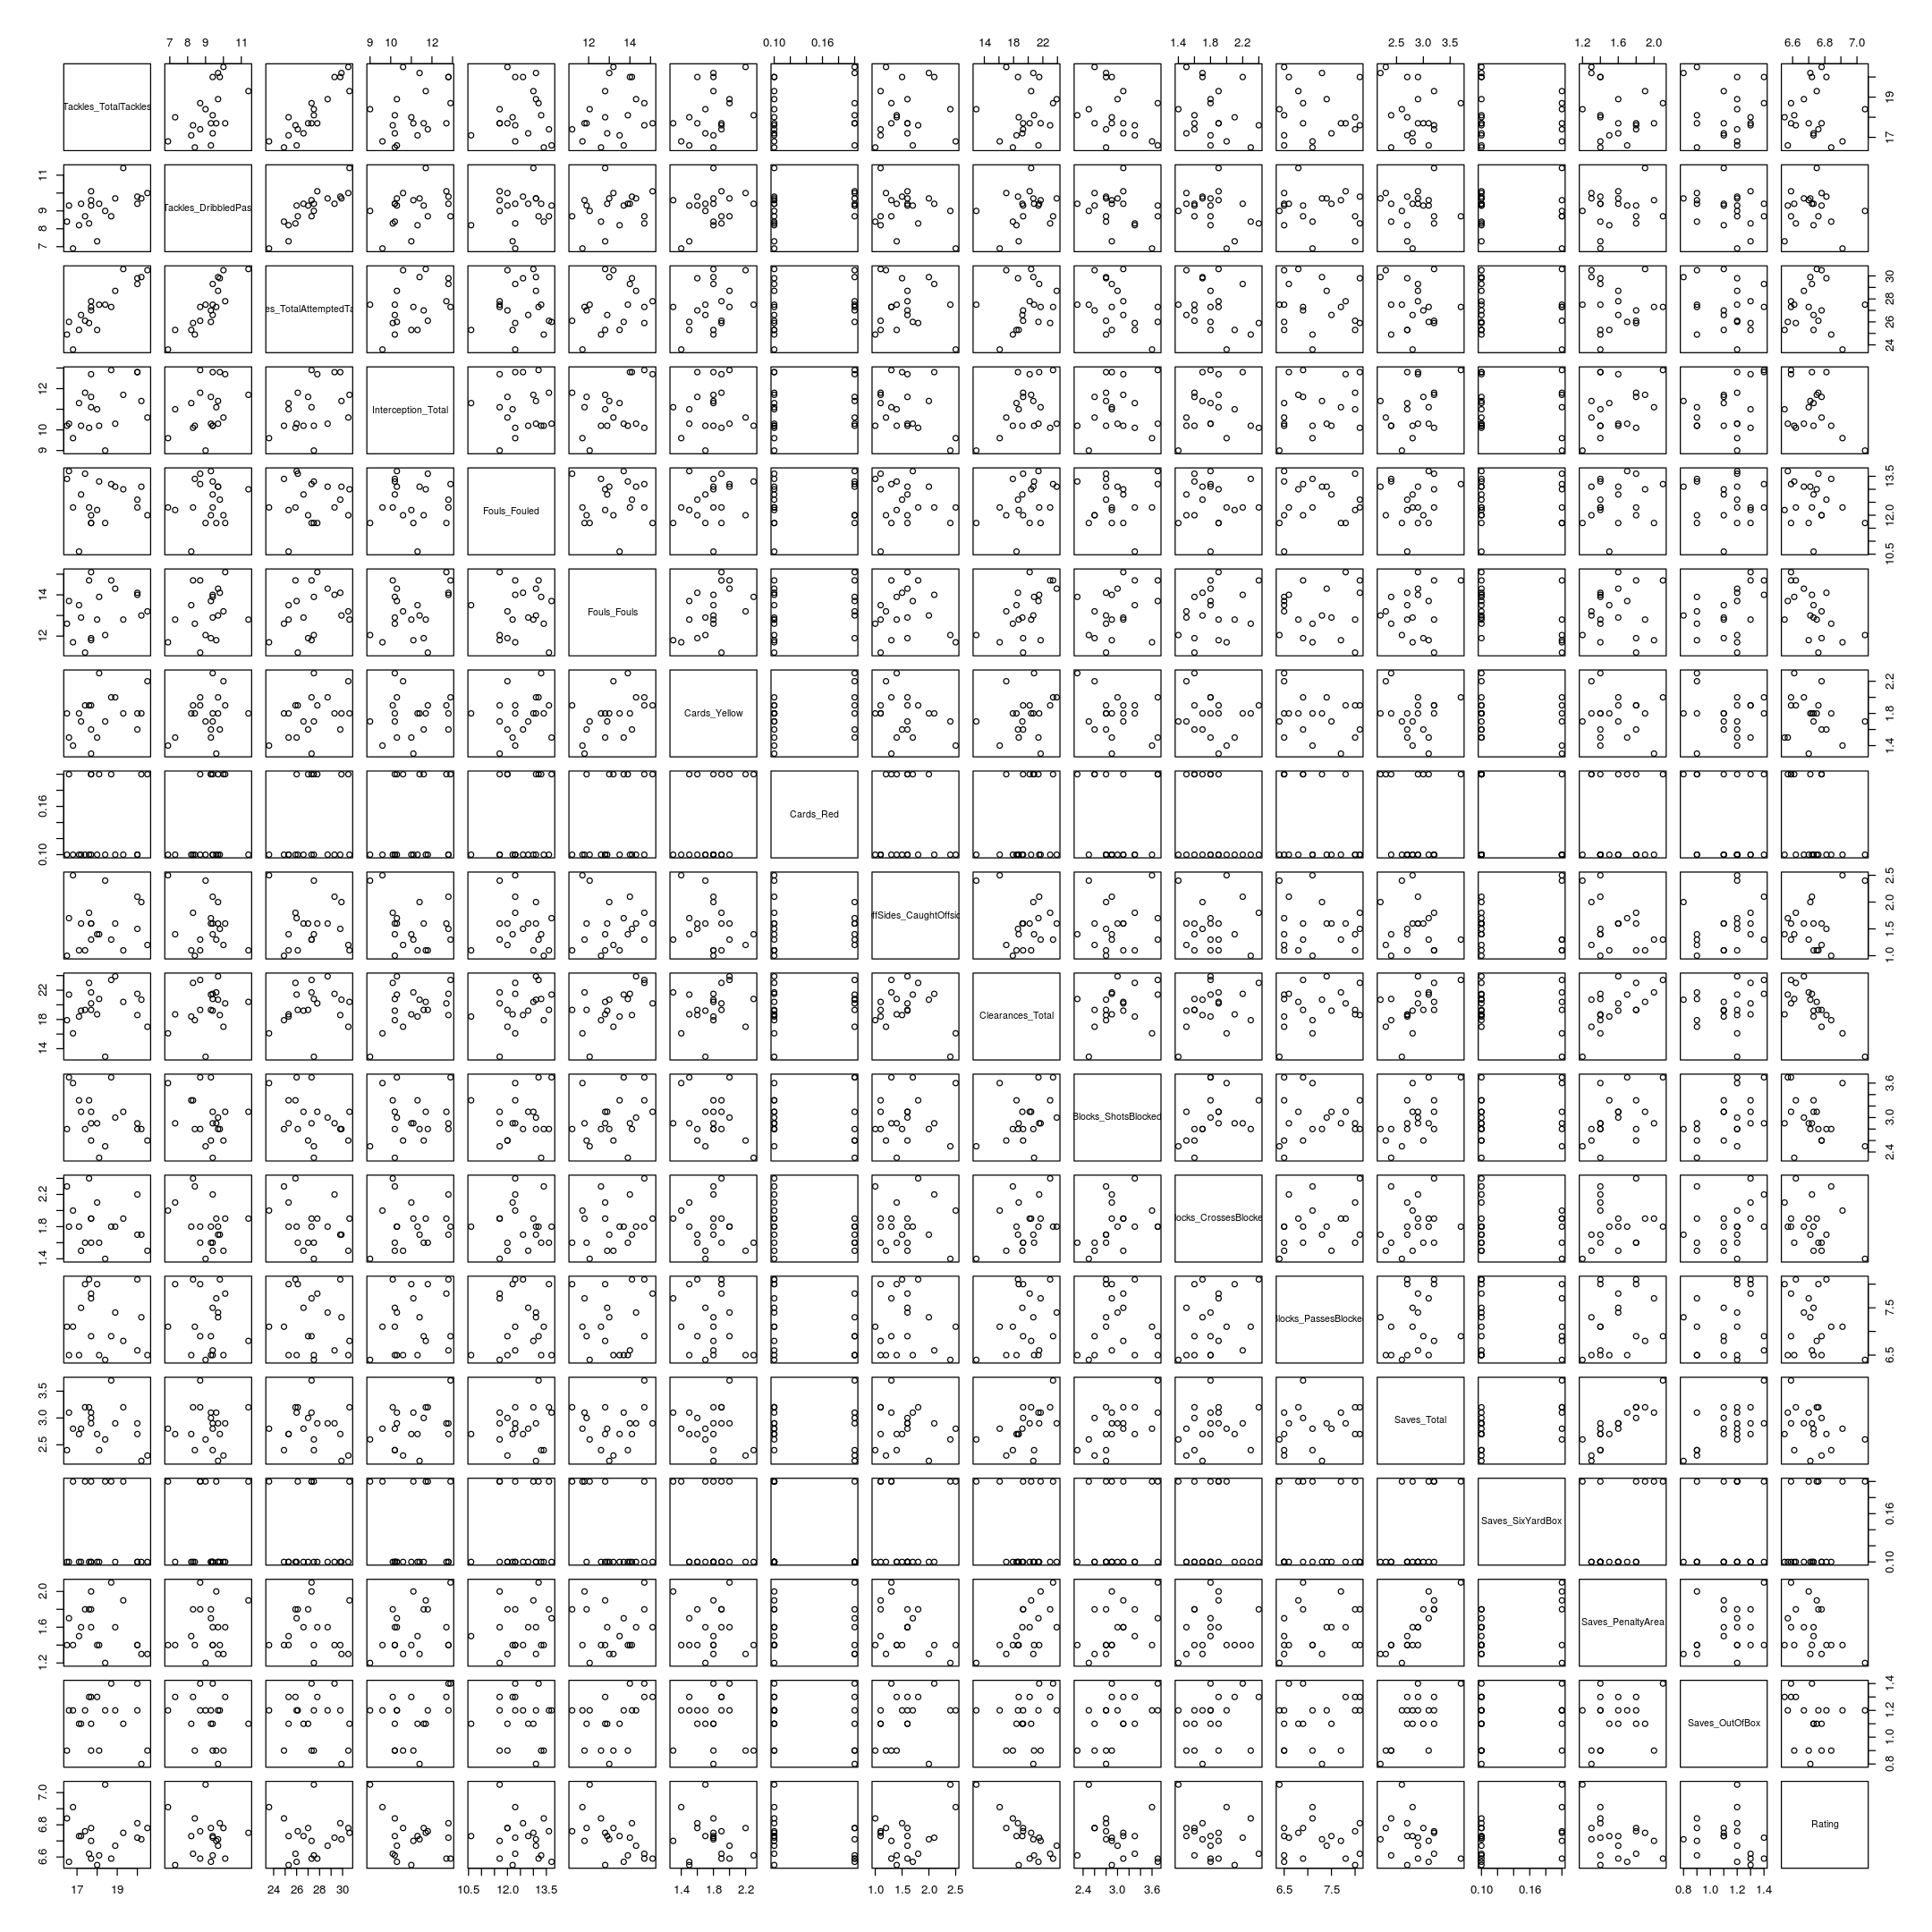

In [9]:
options(repr.plot.width=18, repr.plot.height=18)
pairs(def)

Ce qui nous intéresse c'est les variables corrélées avec la variable `Rating`. Au vu du scatter matrix, la variable `Clearances_Total` est corrélée linéairement. Les variables `Fouls_Fouls` et `Interception_Total` semblent un peu corrélées. Des classes apparaissent avec les variables `Cards_Red`, `Saves_SixYardsBox`, `Saves_OutOfBox`.

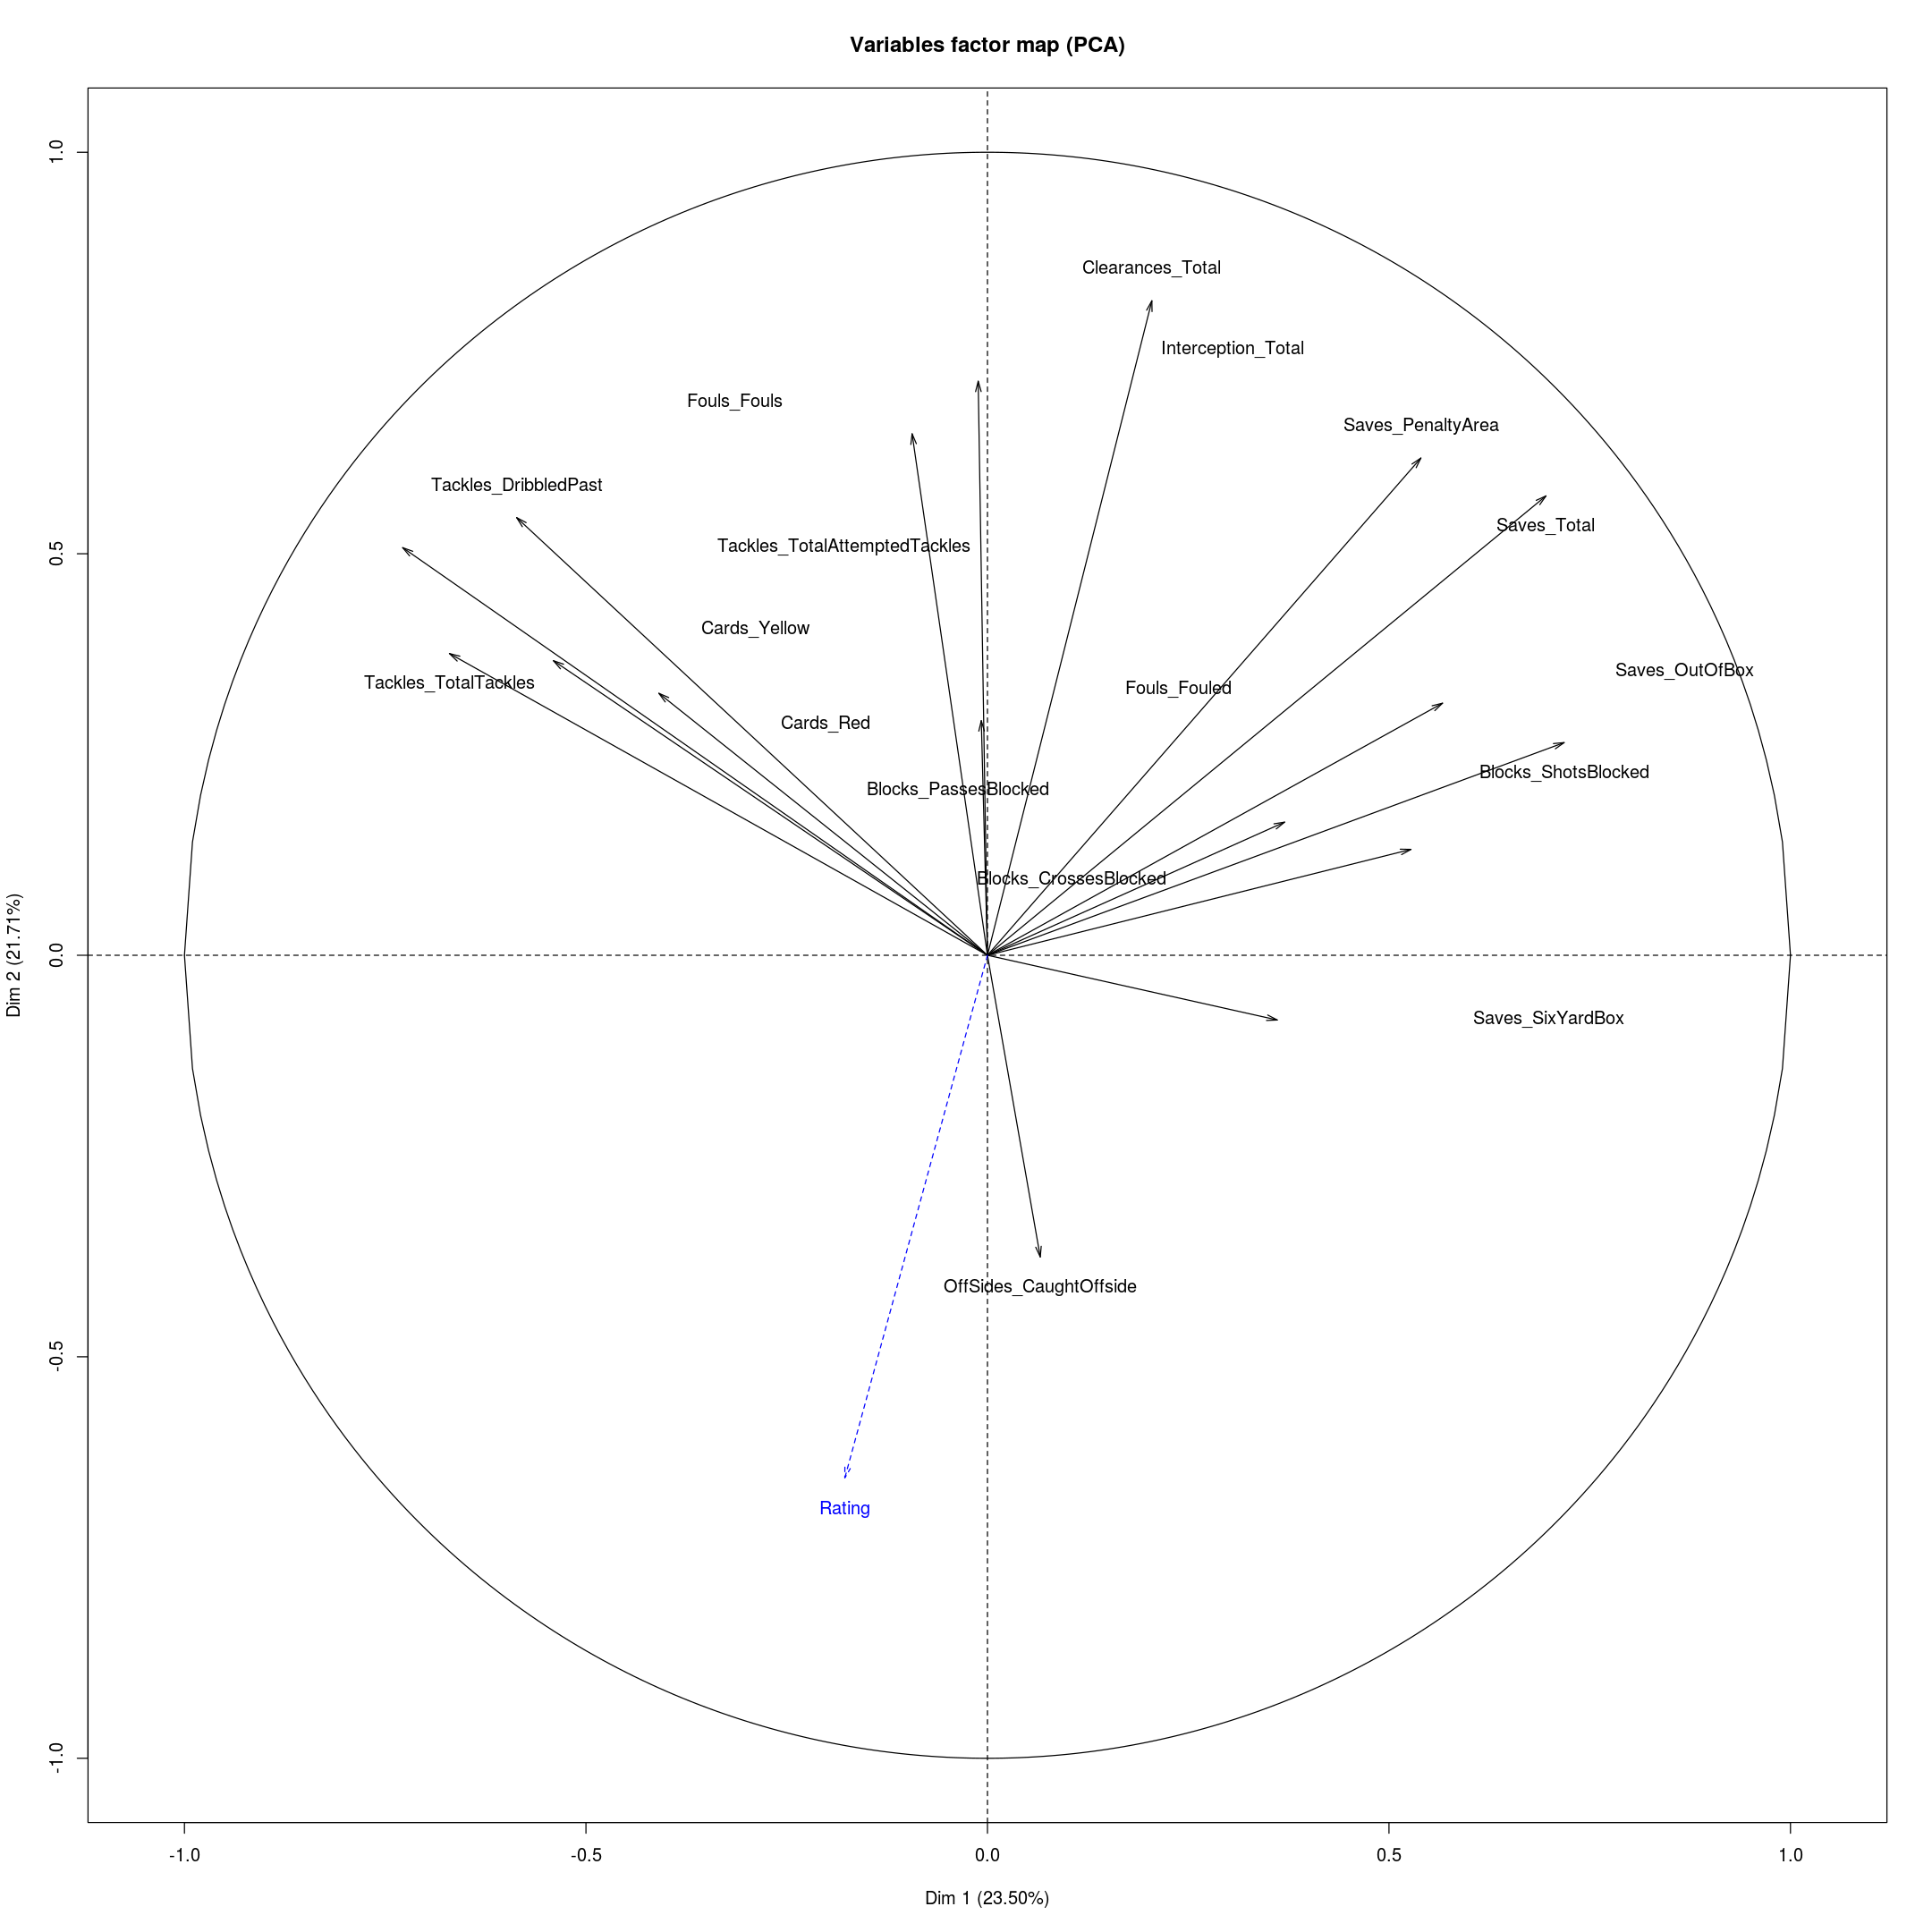

In [10]:
pca=PCA(def,scale.unit=T,graph=F, quanti.sup = 18)
plot(pca, axes = c(1,2), choix="var")

Pour l'ACP des dimensions 1 et 2 (pour seulement 44% de l'information), on remarque que `Rating` est corrélé négativement avec `Clearances`. On voit aussi que dans ce plan, il ne semble pas y avoir de relations entre le nombre de cartons, jaunes ou rouge, ou la quantité de tacles avec la variable `Rating`.

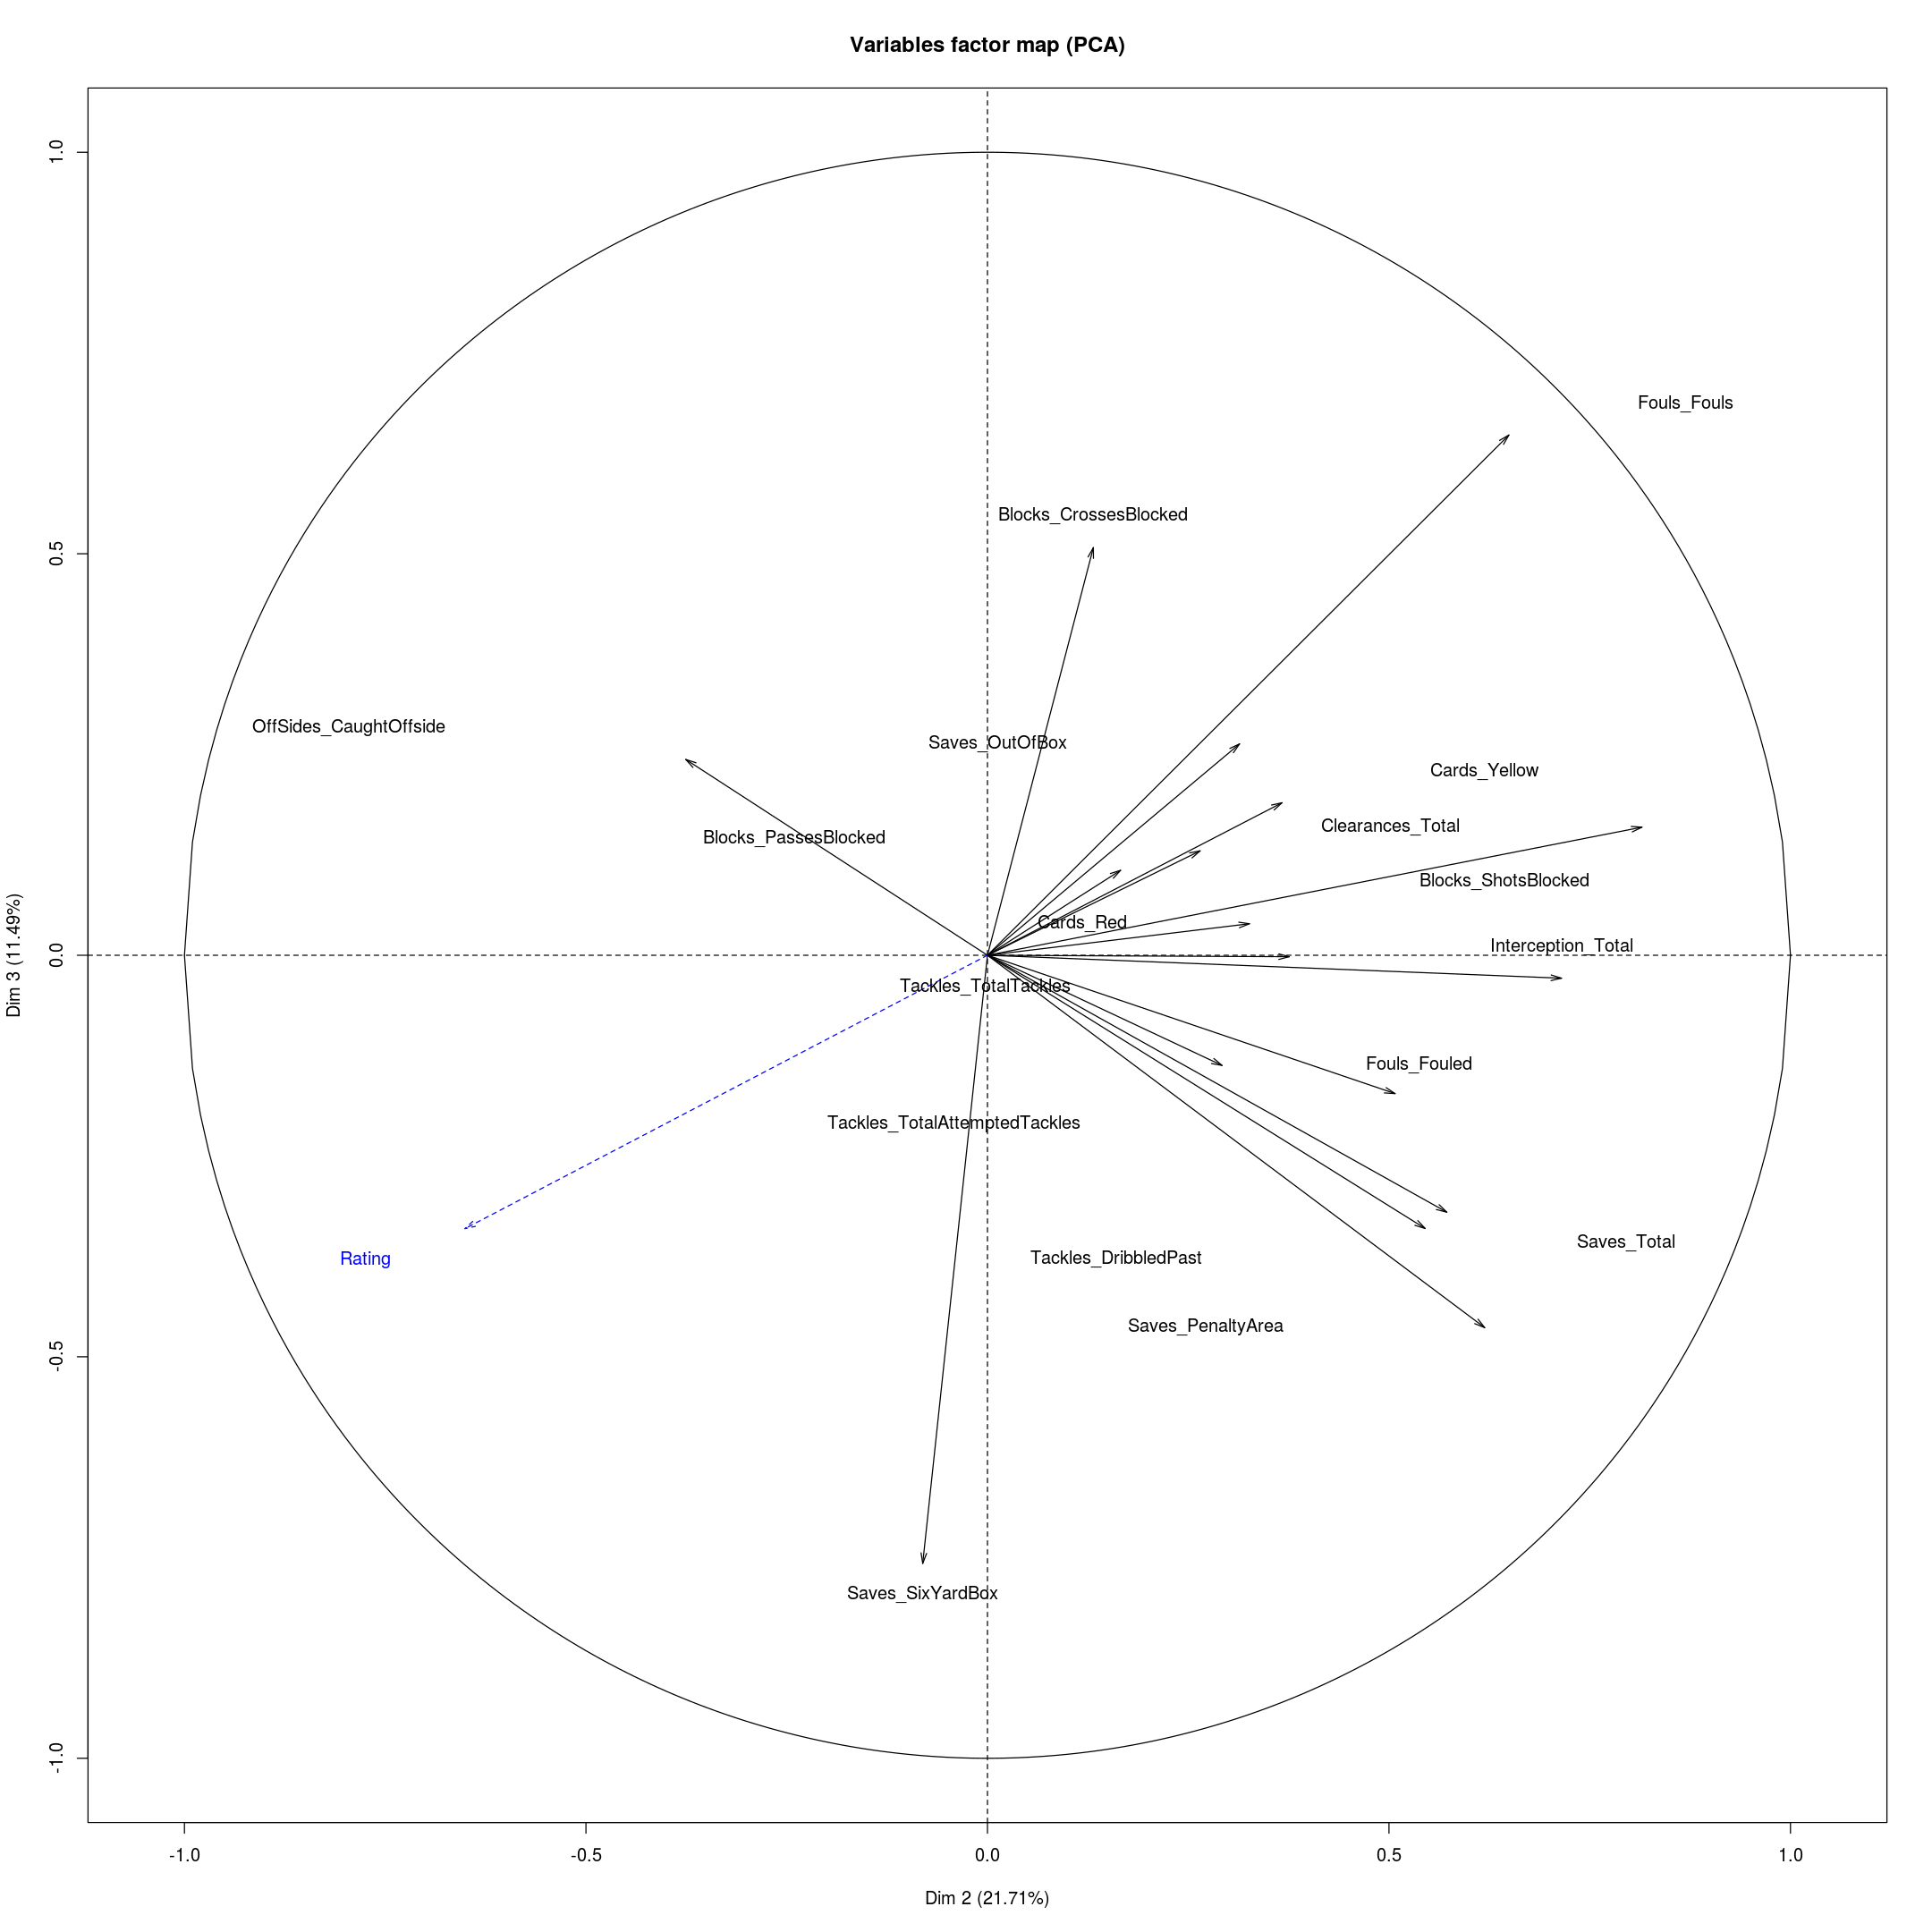

In [11]:
plot(pca, axes = c(2,3), choix="var")

Dans ce plan, les tacles sont très mal expliqués. On peut donc penser que l'information contenue à leur sujet dans le premier plan est suffisante pour affirmer qu'ils n'influent pas la variable `Rating`. On voit que la variable `Clearance` est toujours très corrélée négativement.  
Dans ce plan, la variable `Fouls_Fouls` (=fautes effectuées par notre équipe) est négativement corrélée avec `Rating`.

## ANALYSE DESCRIPTIVE DONNEES PASSING

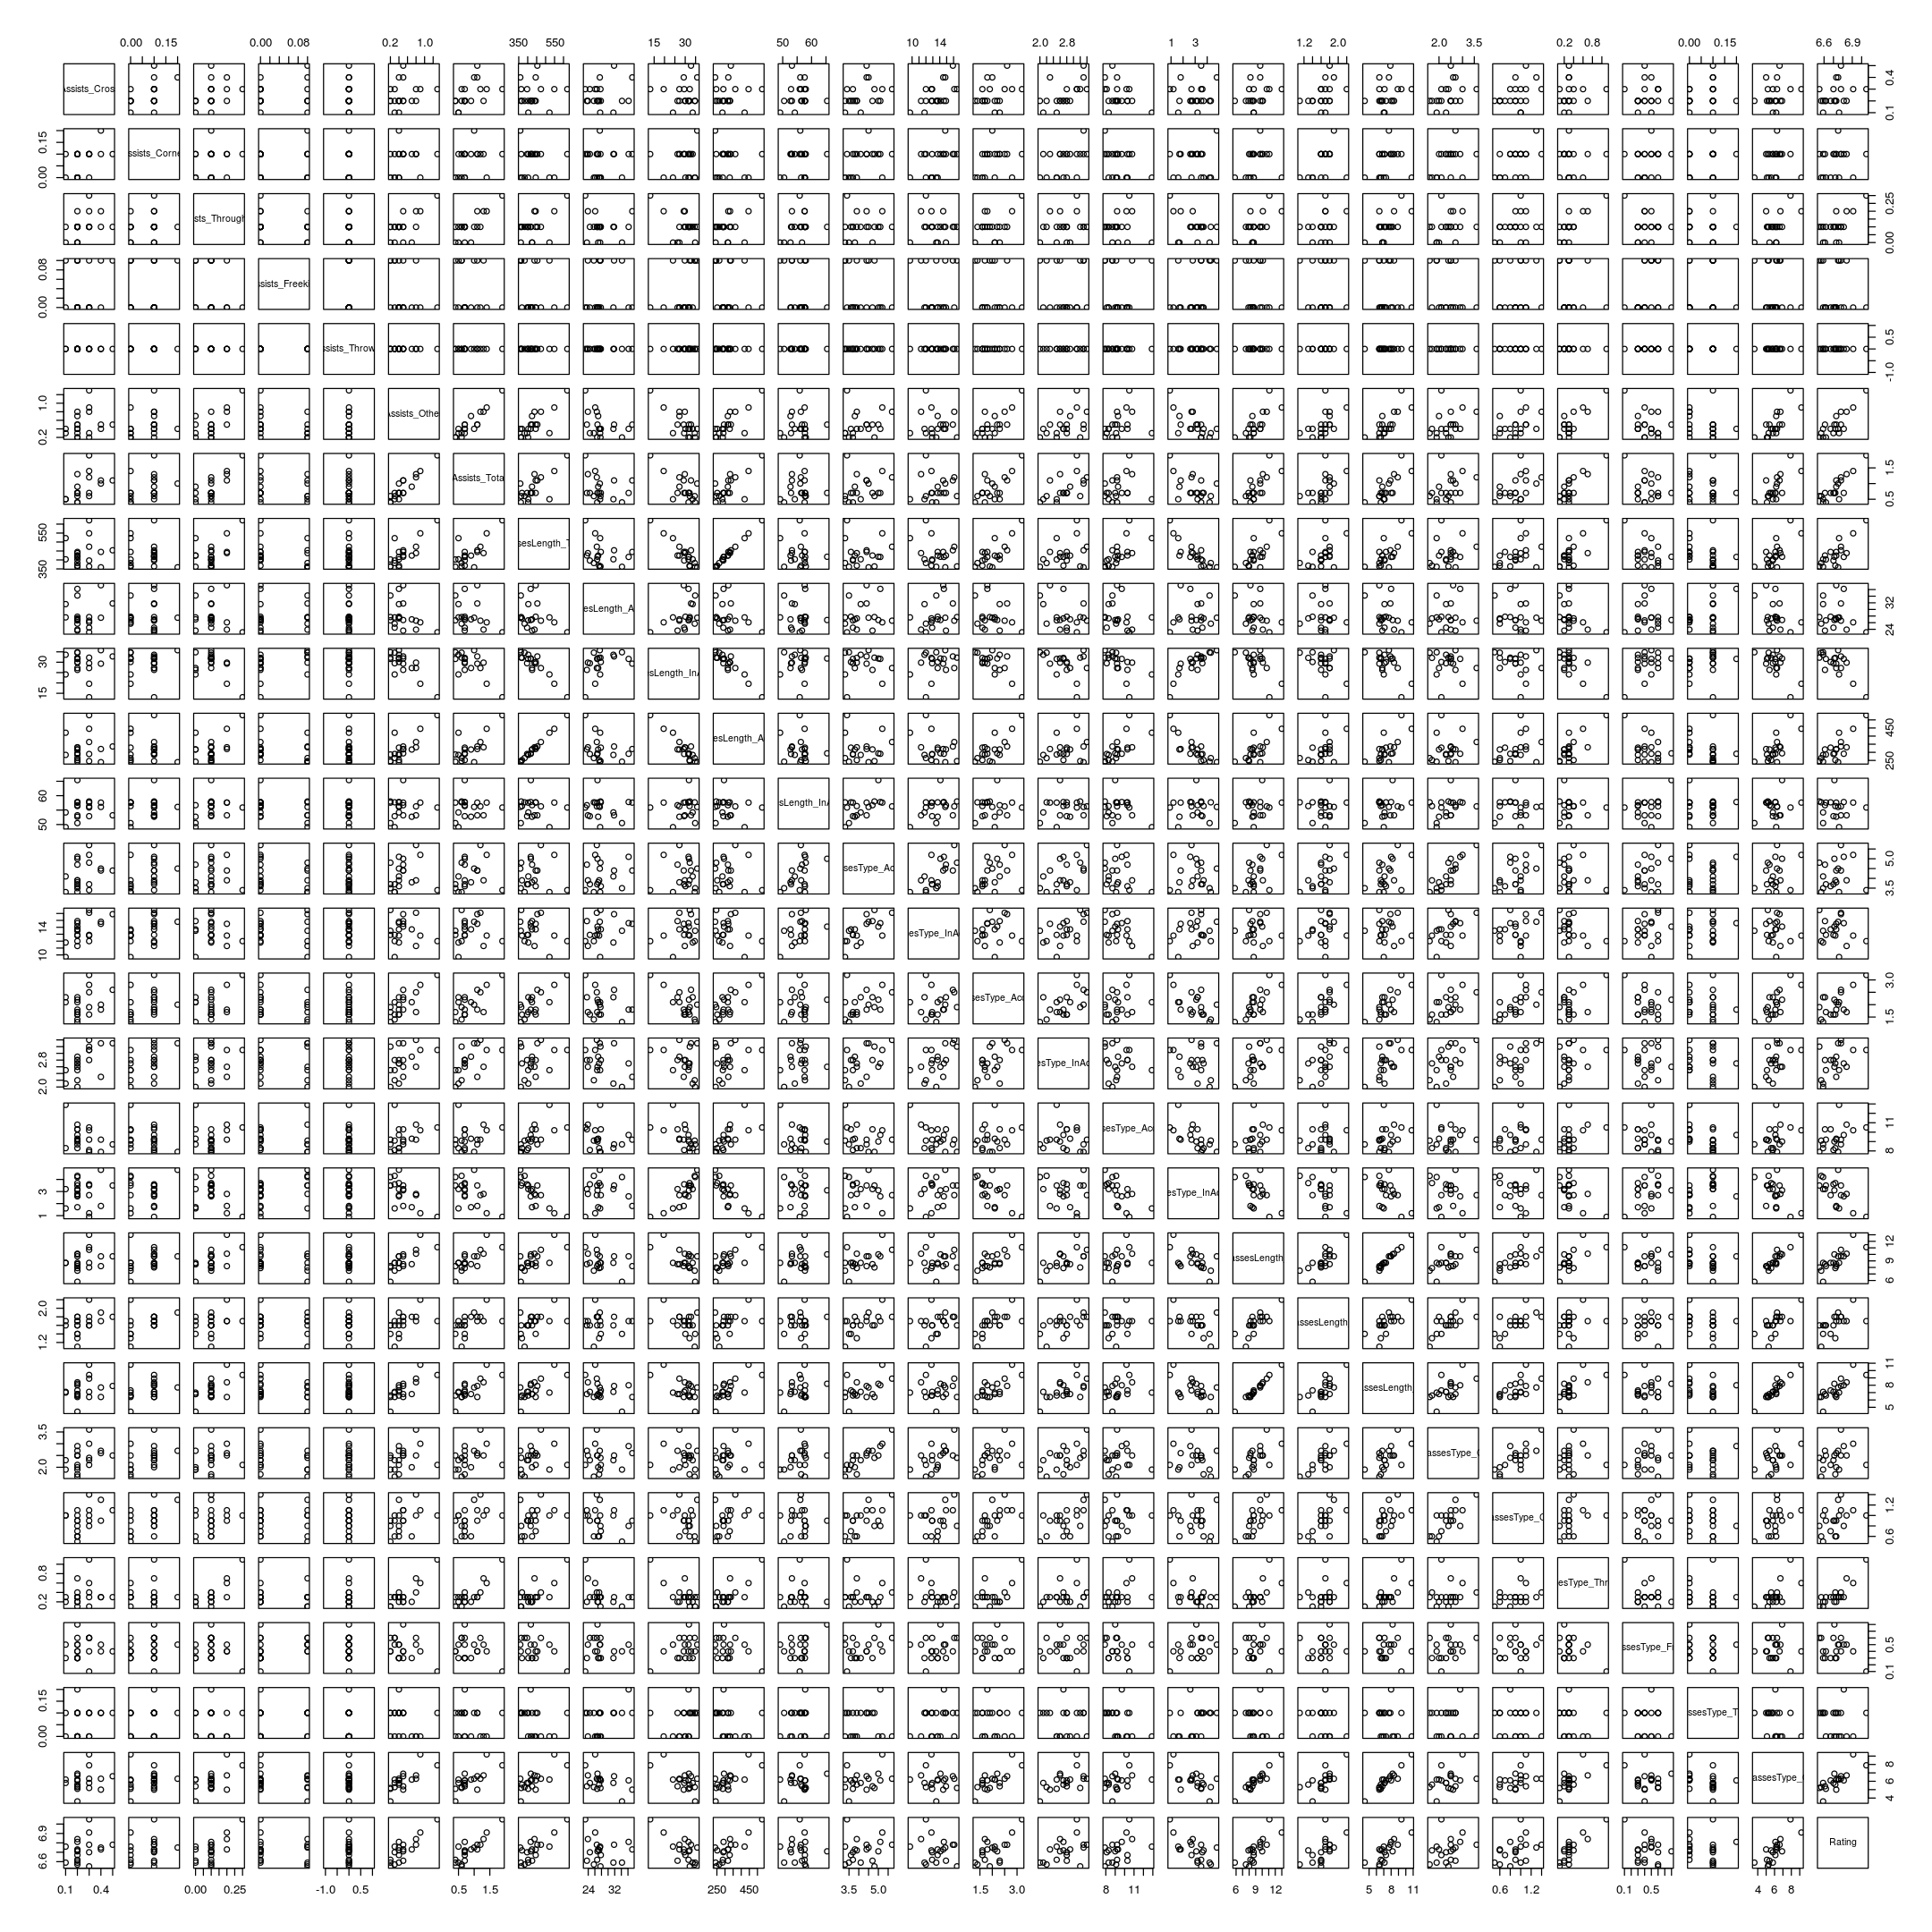

In [12]:
options(repr.plot.width=18, repr.plot.height=18)
pairs(pas_complet)

Les variables `PassesLength_Total`, `PassesType_Other`, `KeyPassesLength_Short`, `Assists_Other` et `Assists_Total` sont corrélées linéairement avec la variable à expliquer `Rating`.

In [13]:
pas = pas_complet[-c(5)]
pas

Assists_Cross Assists_Corner Assists_Throughball
Paris Saint-Germain 0.3           0.1            0.3                
Lyon                0.3           0.0            0.2                
Lille               0.2           0.1            0.2                
Montpellier         0.2           0.1            0.1                
Saint-Etienne       0.5           0.1            0.1                
Marseille           0.3           0.1            0.1                
Nice                0.1           0.0            0.0                
Nimes               0.4           0.2            0.1                
Rennes              0.2           0.1            0.0                
Strasbourg          0.4           0.1            0.2                
Reims               0.2           0.0            0.1                
Nantes              0.2           0.1            0.1                
Angers              0.3           0.1            0.1                
Bordeaux            0.2           0.0            0.1                
Toulouse            0.2           0.0            0.1                
Monaco              0.2           0.1            0.0                
Dijon               0.1           0.1            0.1                
Caen                0.2           0.0            0.0                
Amiens              0.2           0.0            0.1                
Guingamp            0.3           0.1            0.1                
                    Assists_Freekick Assists_Other Assists_Total
Paris Saint-Germain 0.0              1.3           1.9          
Lyon                0.0              0.9           1.4          
Lille               0.1              0.8           1.3          
Montpellier         0.0              0.4           0.7          
Saint-Etienne       0.1              0.5           1.1          
Marseille           0.0              0.8           1.2          
Nice                0.1              0.3           0.5          
Nimes               0.1              0.4           1.0          
Rennes              0.0              0.7           0.9          
Strasbourg          0.0              0.5           1.1          
Reims               0.0              0.4           0.7          
Nantes              0.0              0.5           0.7          
Angers              0.0              0.3           0.7          
Bordeaux            0.0              0.4           0.7          
Toulouse            0.0              0.2           0.4          
Monaco              0.0              0.5           0.7          
Dijon               0.0              0.4           0.5          
Caen                0.1              0.2           0.4          
Amiens              0.1              0.3           0.6          
Guingamp            0.1              0.2           0.6          
                    PassesLength_Total PassesLength_AccLB PassesLength_InAccLB
Paris Saint-Germain 621.3              23.1               13.1                
Lyon                548.6              26.1               19.6                
Lille               438.1              23.9               29.8                
Montpellier         416.7              36.2               31.6                
Saint-Etienne       453.9              31.8               32.8                
Marseille           473.7              26.6               27.2                
Nice                521.6              27.6               24.1                
Nimes               358.7              27.5               35.8                
Rennes              424.2              27.0               27.2                
Strasbourg          444.6              37.3               29.3                
Reims               368.0              27.3               32.1                
Nantes              417.7              26.8               31.8                
Angers              396.7              24.5               29.5                
Bordeaux            444.6              27.8               30.1                
Toulouse            4

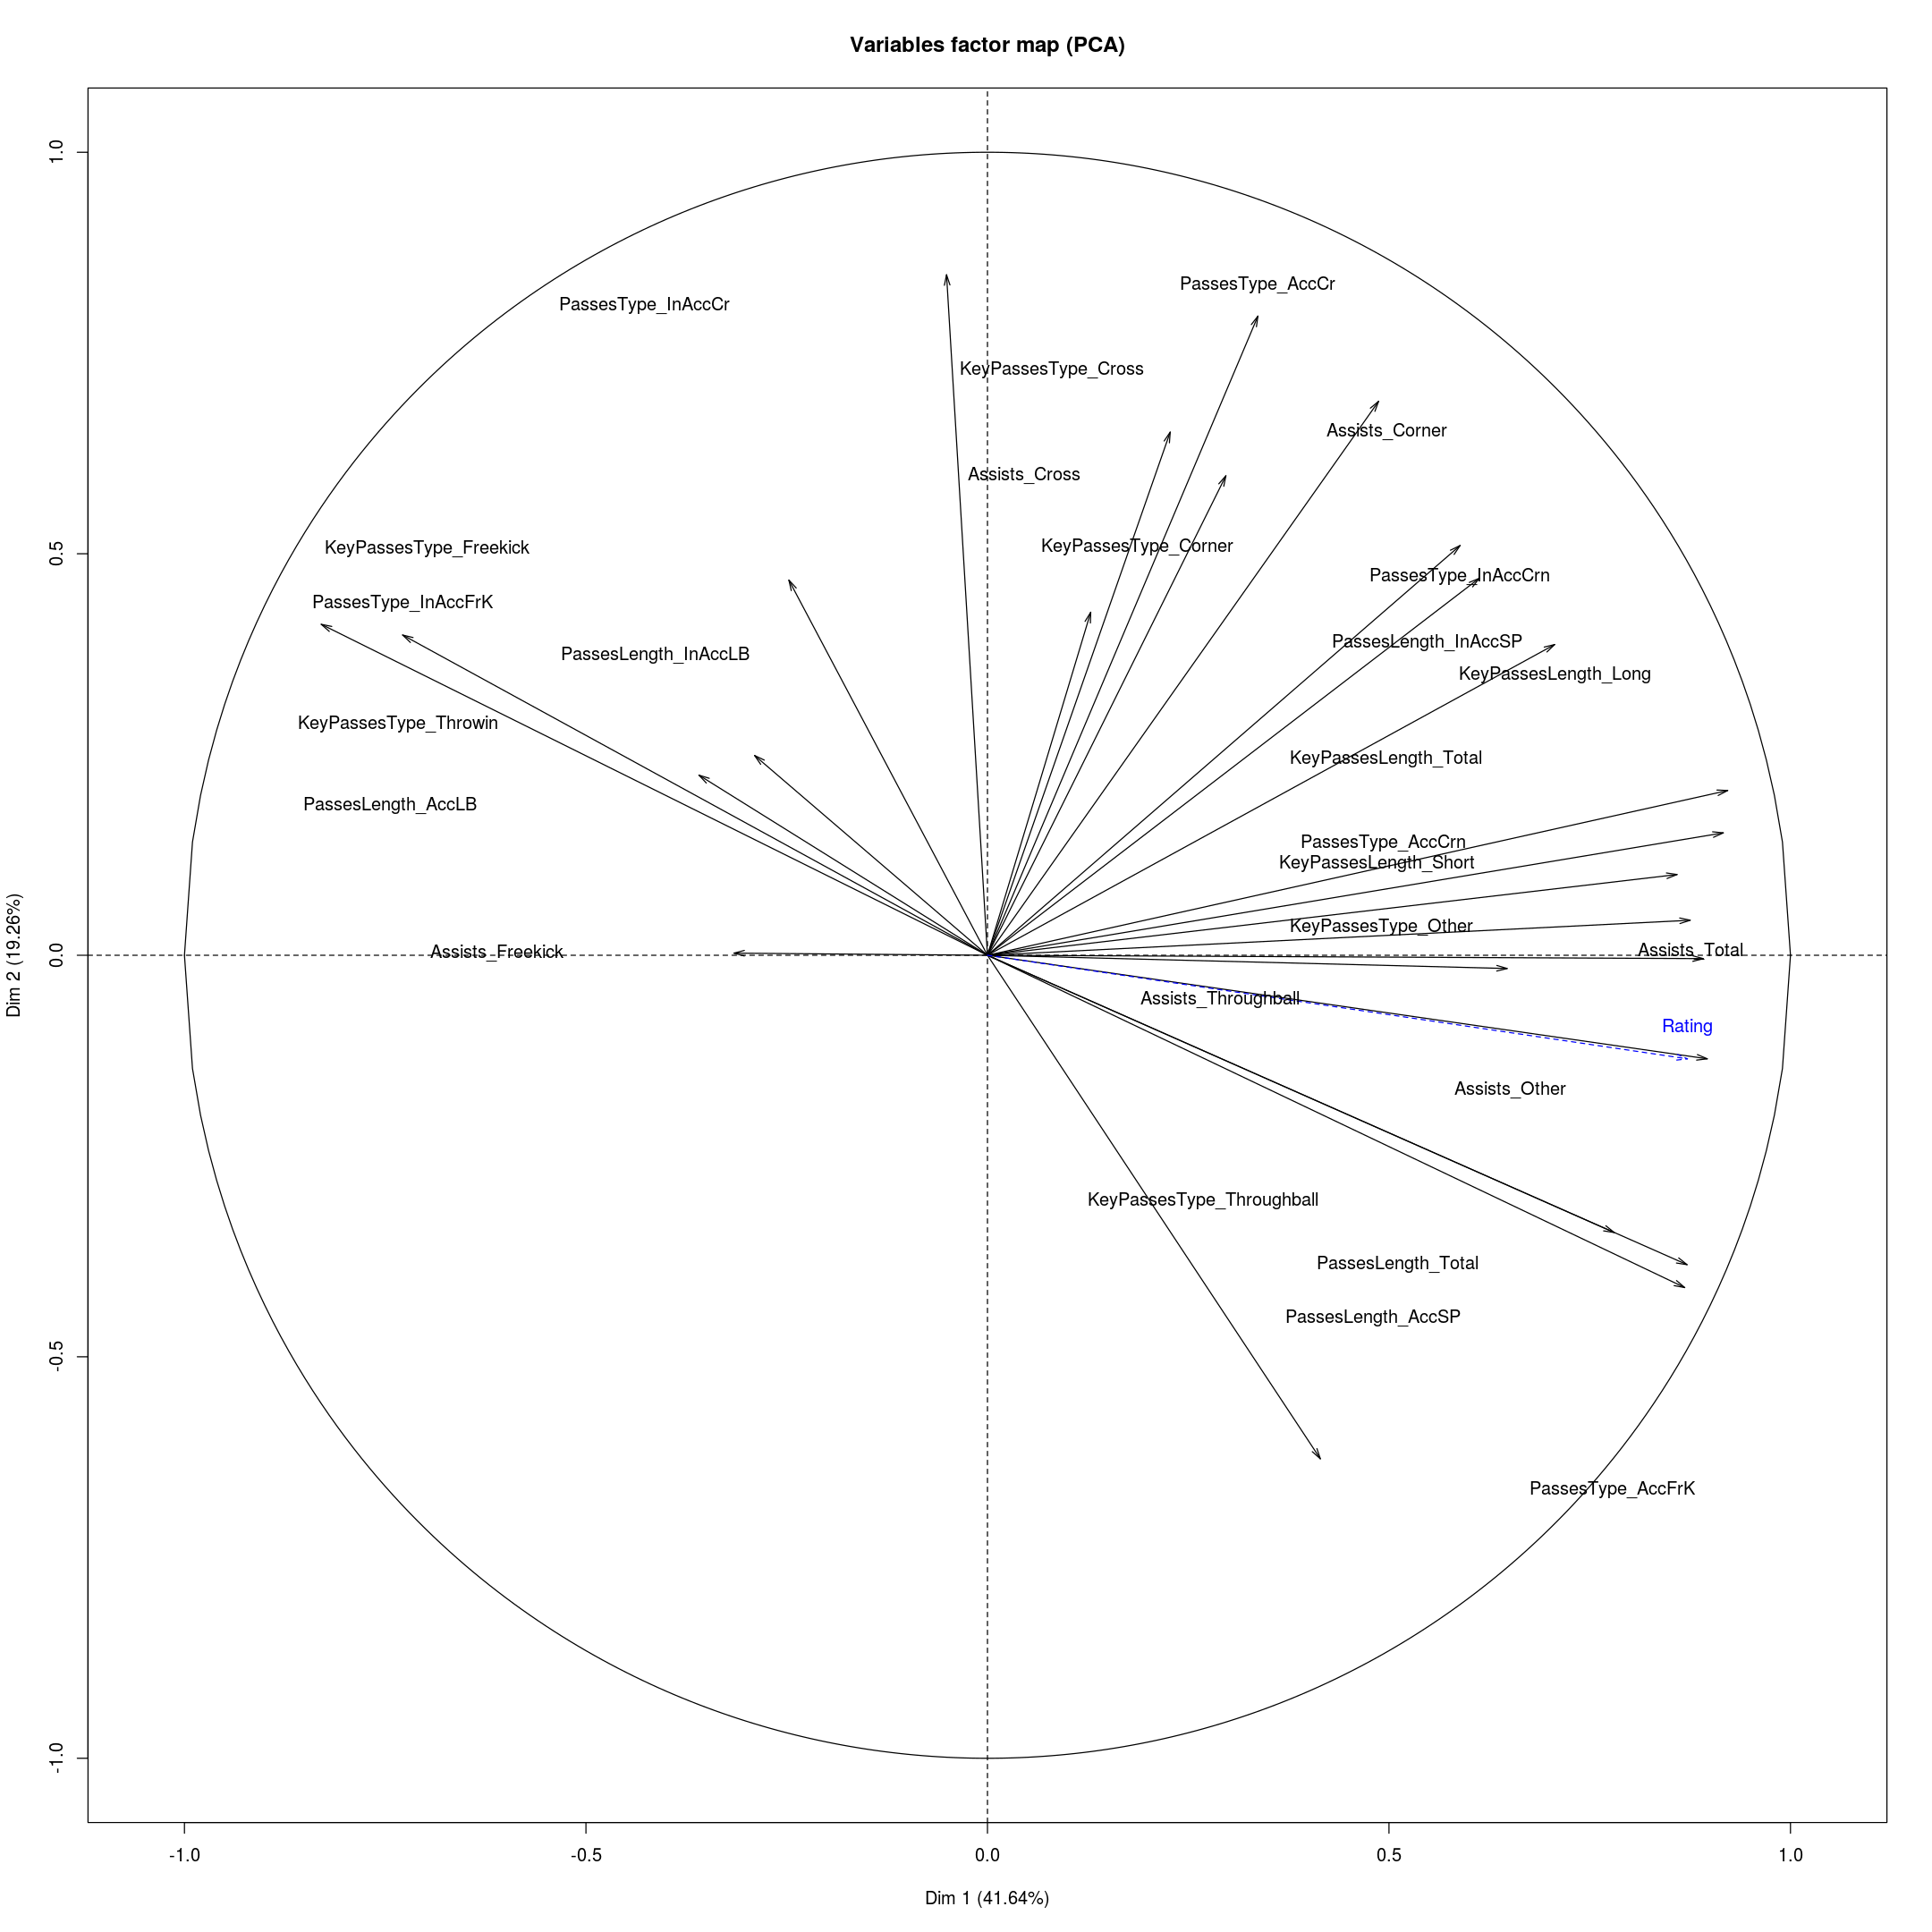

In [14]:
pca = PCA(pas, scale.unit=T, graph=F, quanti.sup = 27)
plot(pca, axes = c(1,2), choix="var")

Ces deux dimenssions expliquent plutôt bien les variables : 60.9% de l'inforation est contenue dans les deux premiers axes.  

La variable `Rating` semble très fortement corrélée à la variable `assists_others` qui représente les passes décisives autres. Les variables `PassesLength_AccSP`, `PassesLength_Total` et `PassesType_AccFrK` qui représentent respectivement les passes courtes réussies, le total du nombre de passes et le nombre de coups francs réussis.  
Les variables `KeyPassesType_Freekick` et `KeyPassesType_Throwing` qui représentent respectivement les passes clés sur un coup franc et les passes clés sur une touche sont corrélées négativement.  
Les variables `PassesType_AccCr` et `PassesType_InAccCrn` qui représentent respectivement les passes centre réussies et le nombre de corners râtés n'influent pas sur la variable `Rating`.

## ANALYSE DESCRIPTIVE DONNEES OFFENSIVES

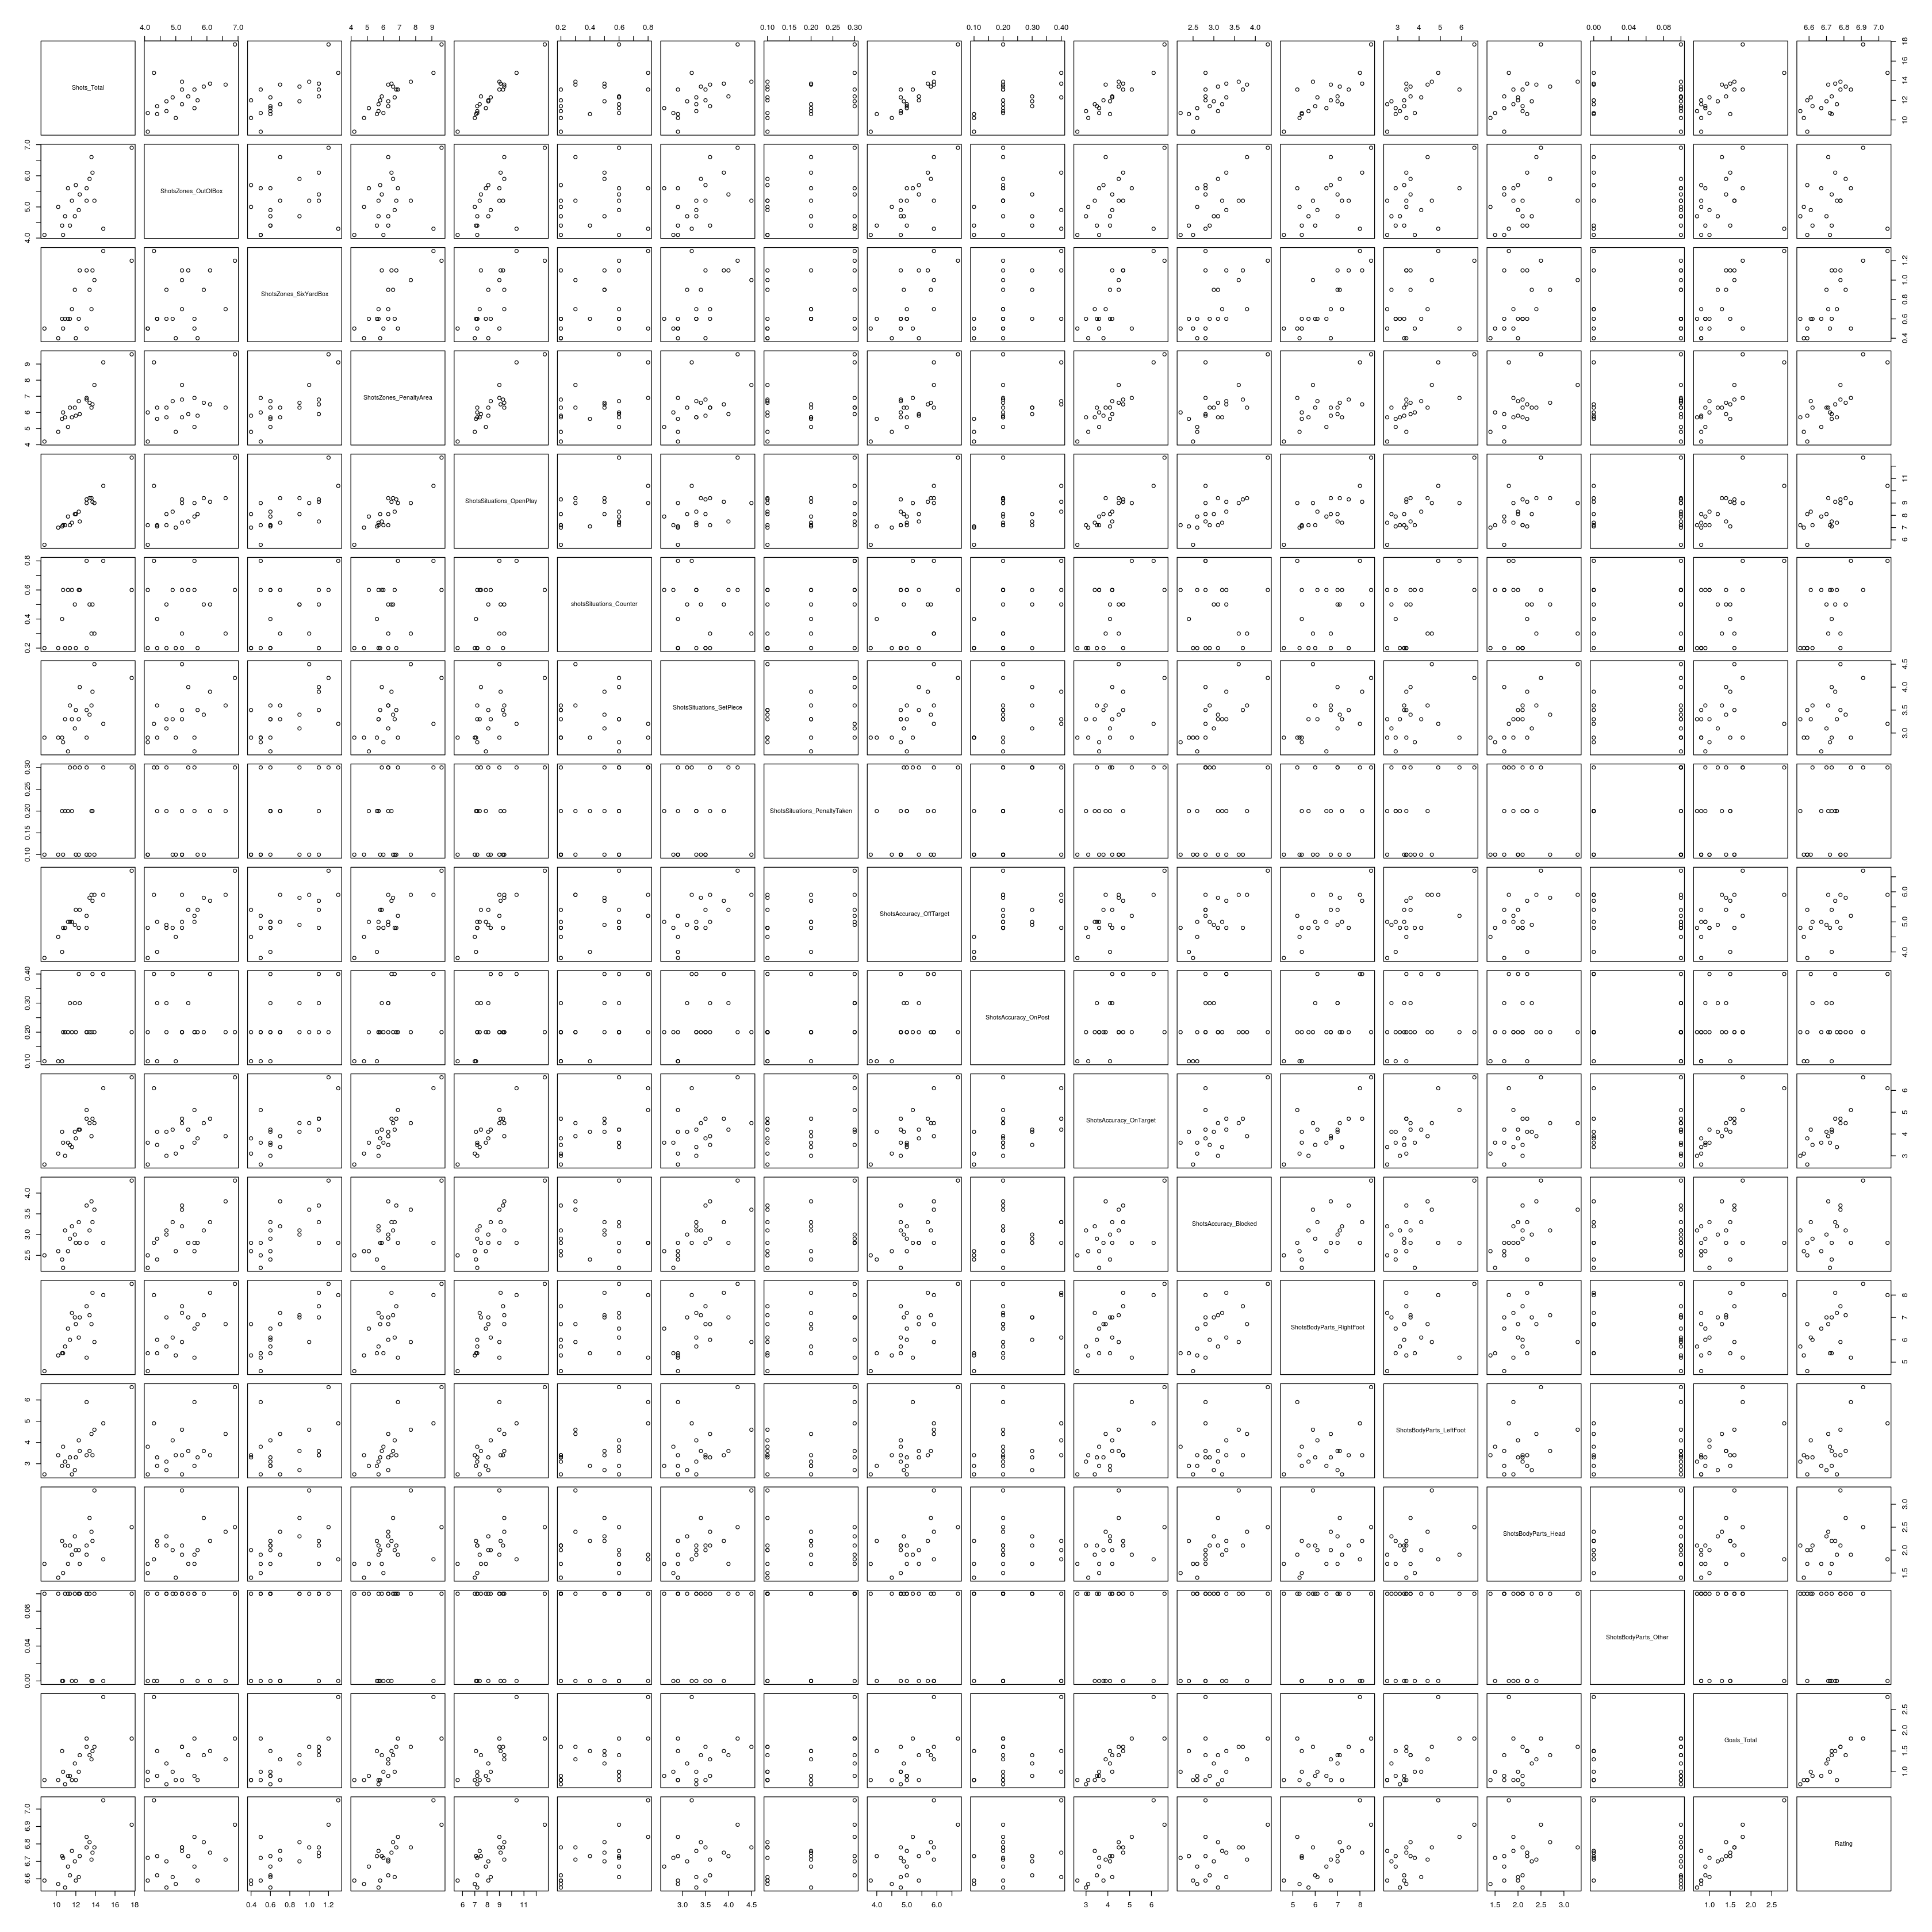

In [67]:
options(repr.plot.width=28, repr.plot.height=28)
pairs(of[c(1:17, 39)])

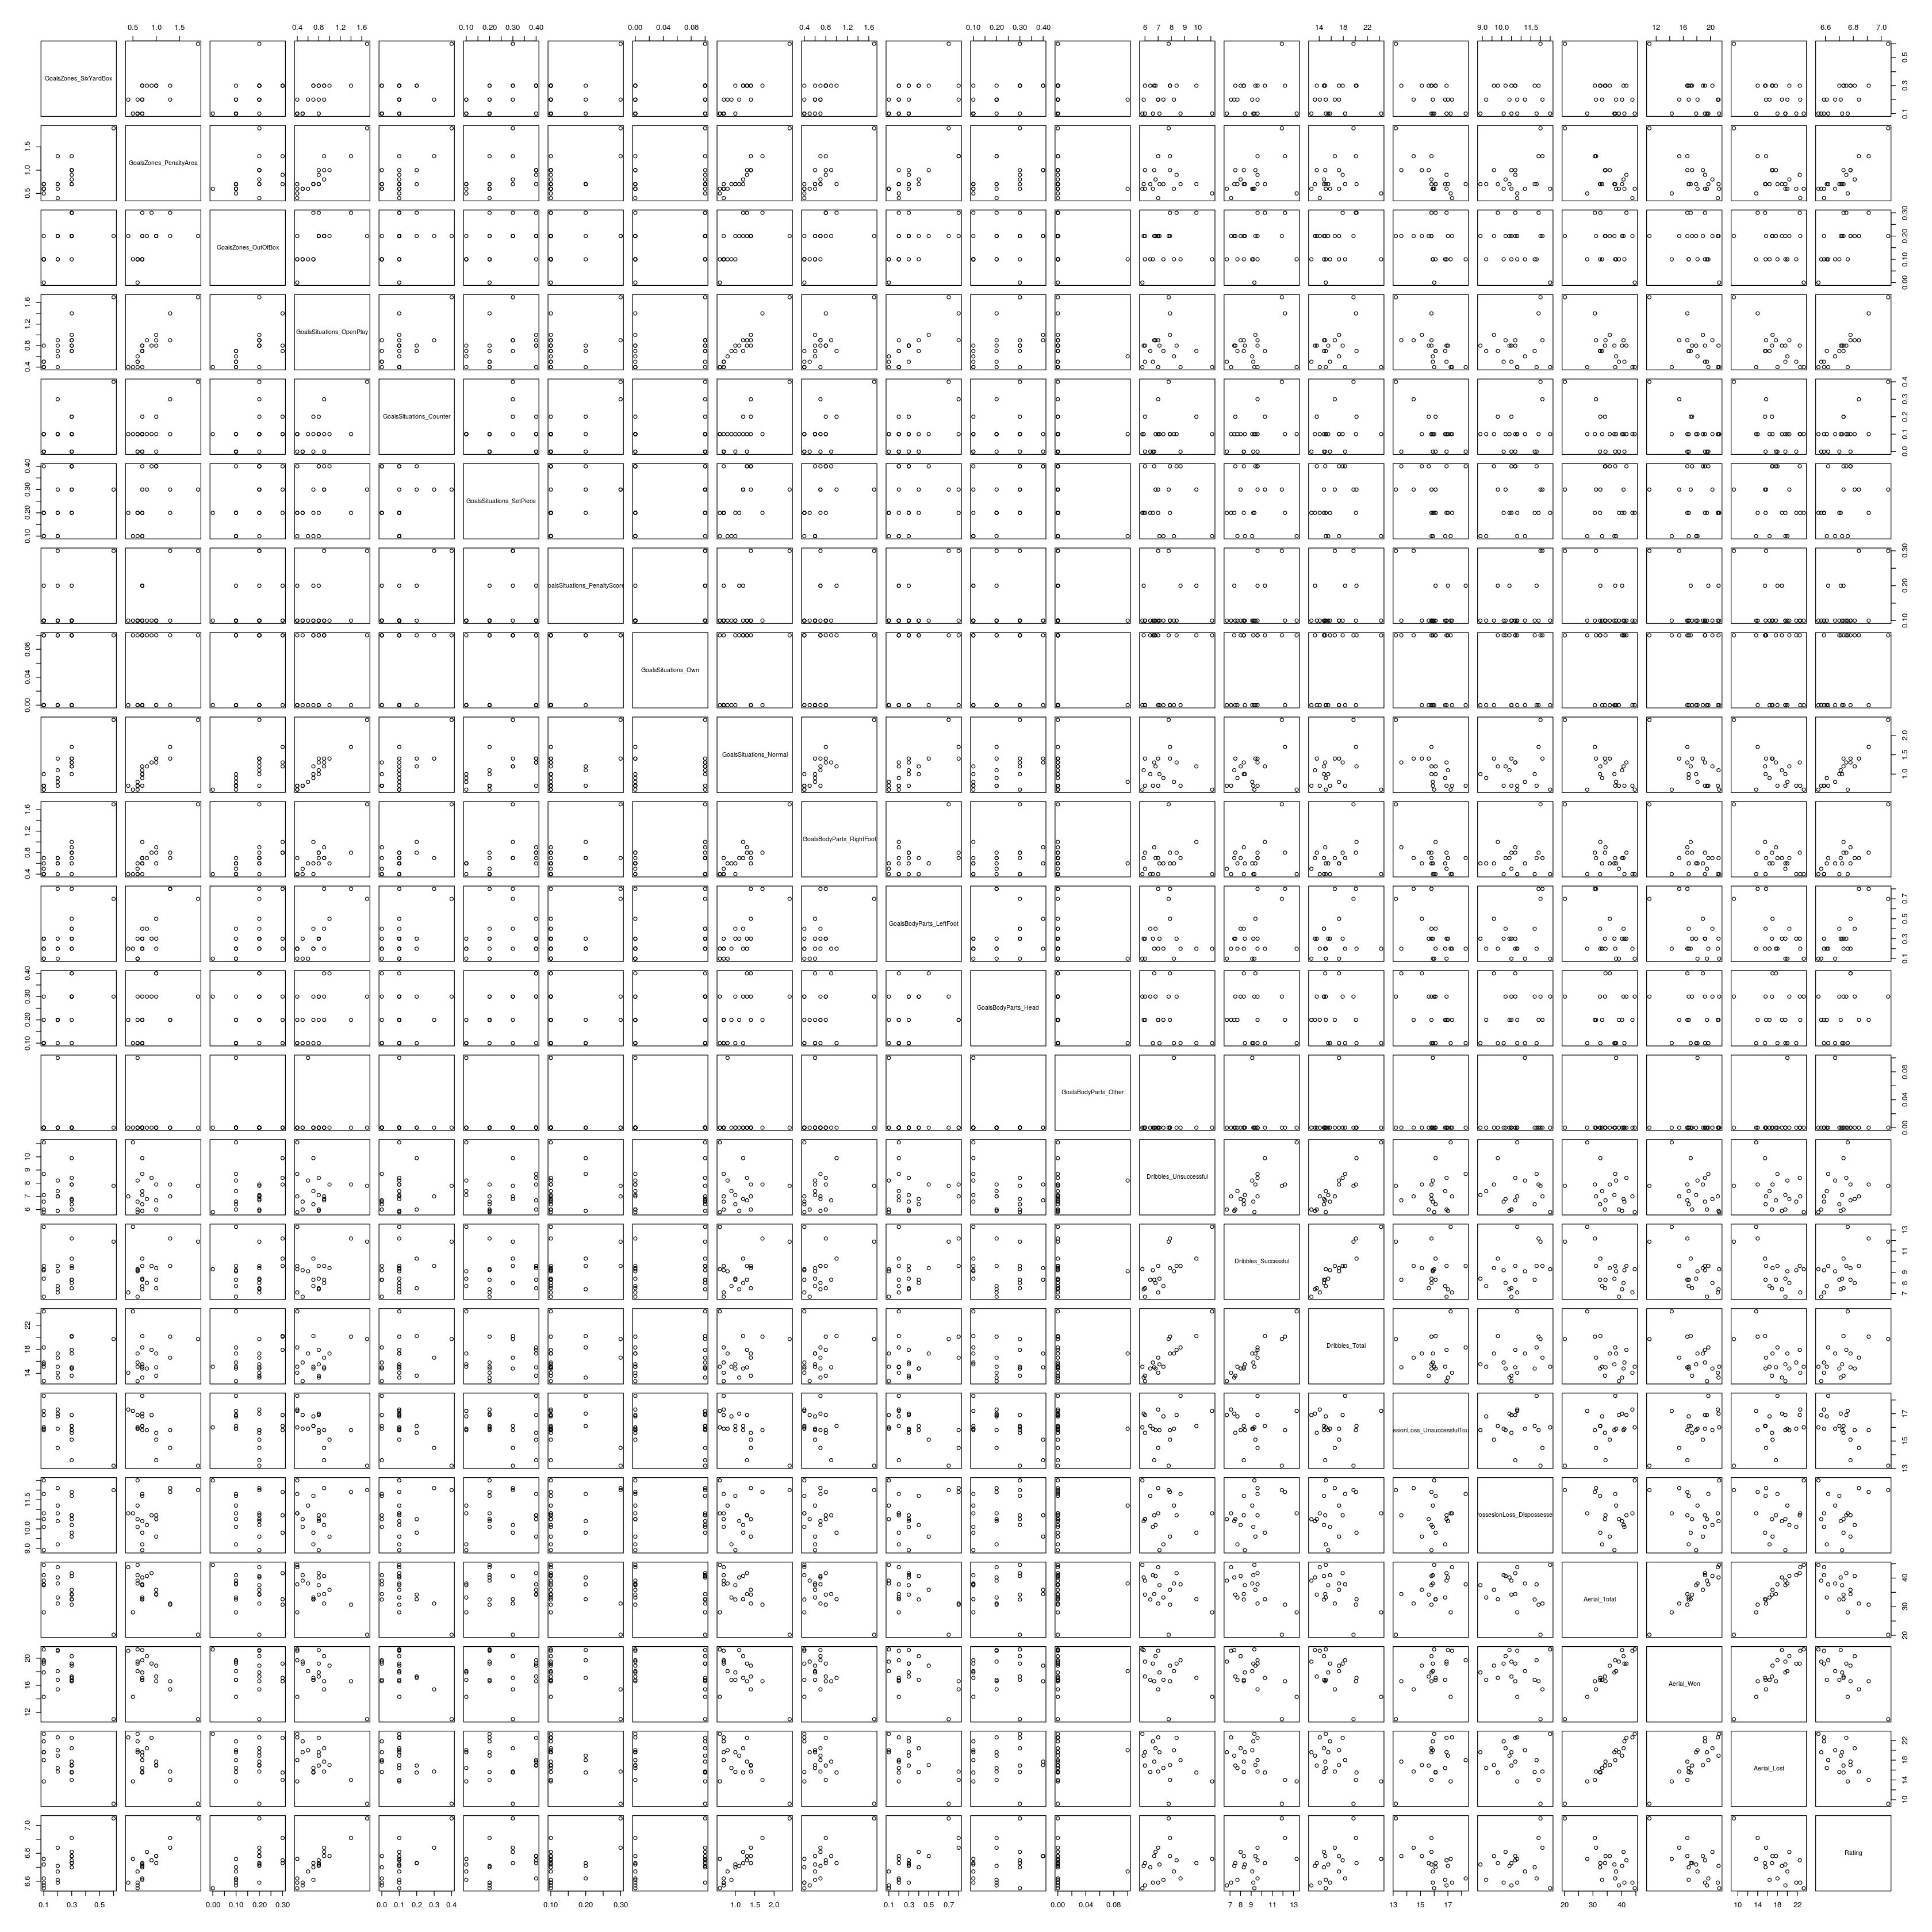

In [68]:
options(repr.plot.width=28, repr.plot.height=28)
pairs(of[18:39])

Les variables `ShotsZones_PenaltyArea`, `Shots_Total`, `ShotsSituations_OpenPlay`, `ShotsAccuracy_OnTarget`, `ShotsBodyParts_Total`, `Goals_Total`, `GoalsSituations_OpenPlay`, `GoalsSituations_Normal` sont corrélées linéairement avec la variable à expliquer `Rating`.  
Les variables `Aerial_Lost` et `Aerial_Total` sont corrélées linéairement négativement.

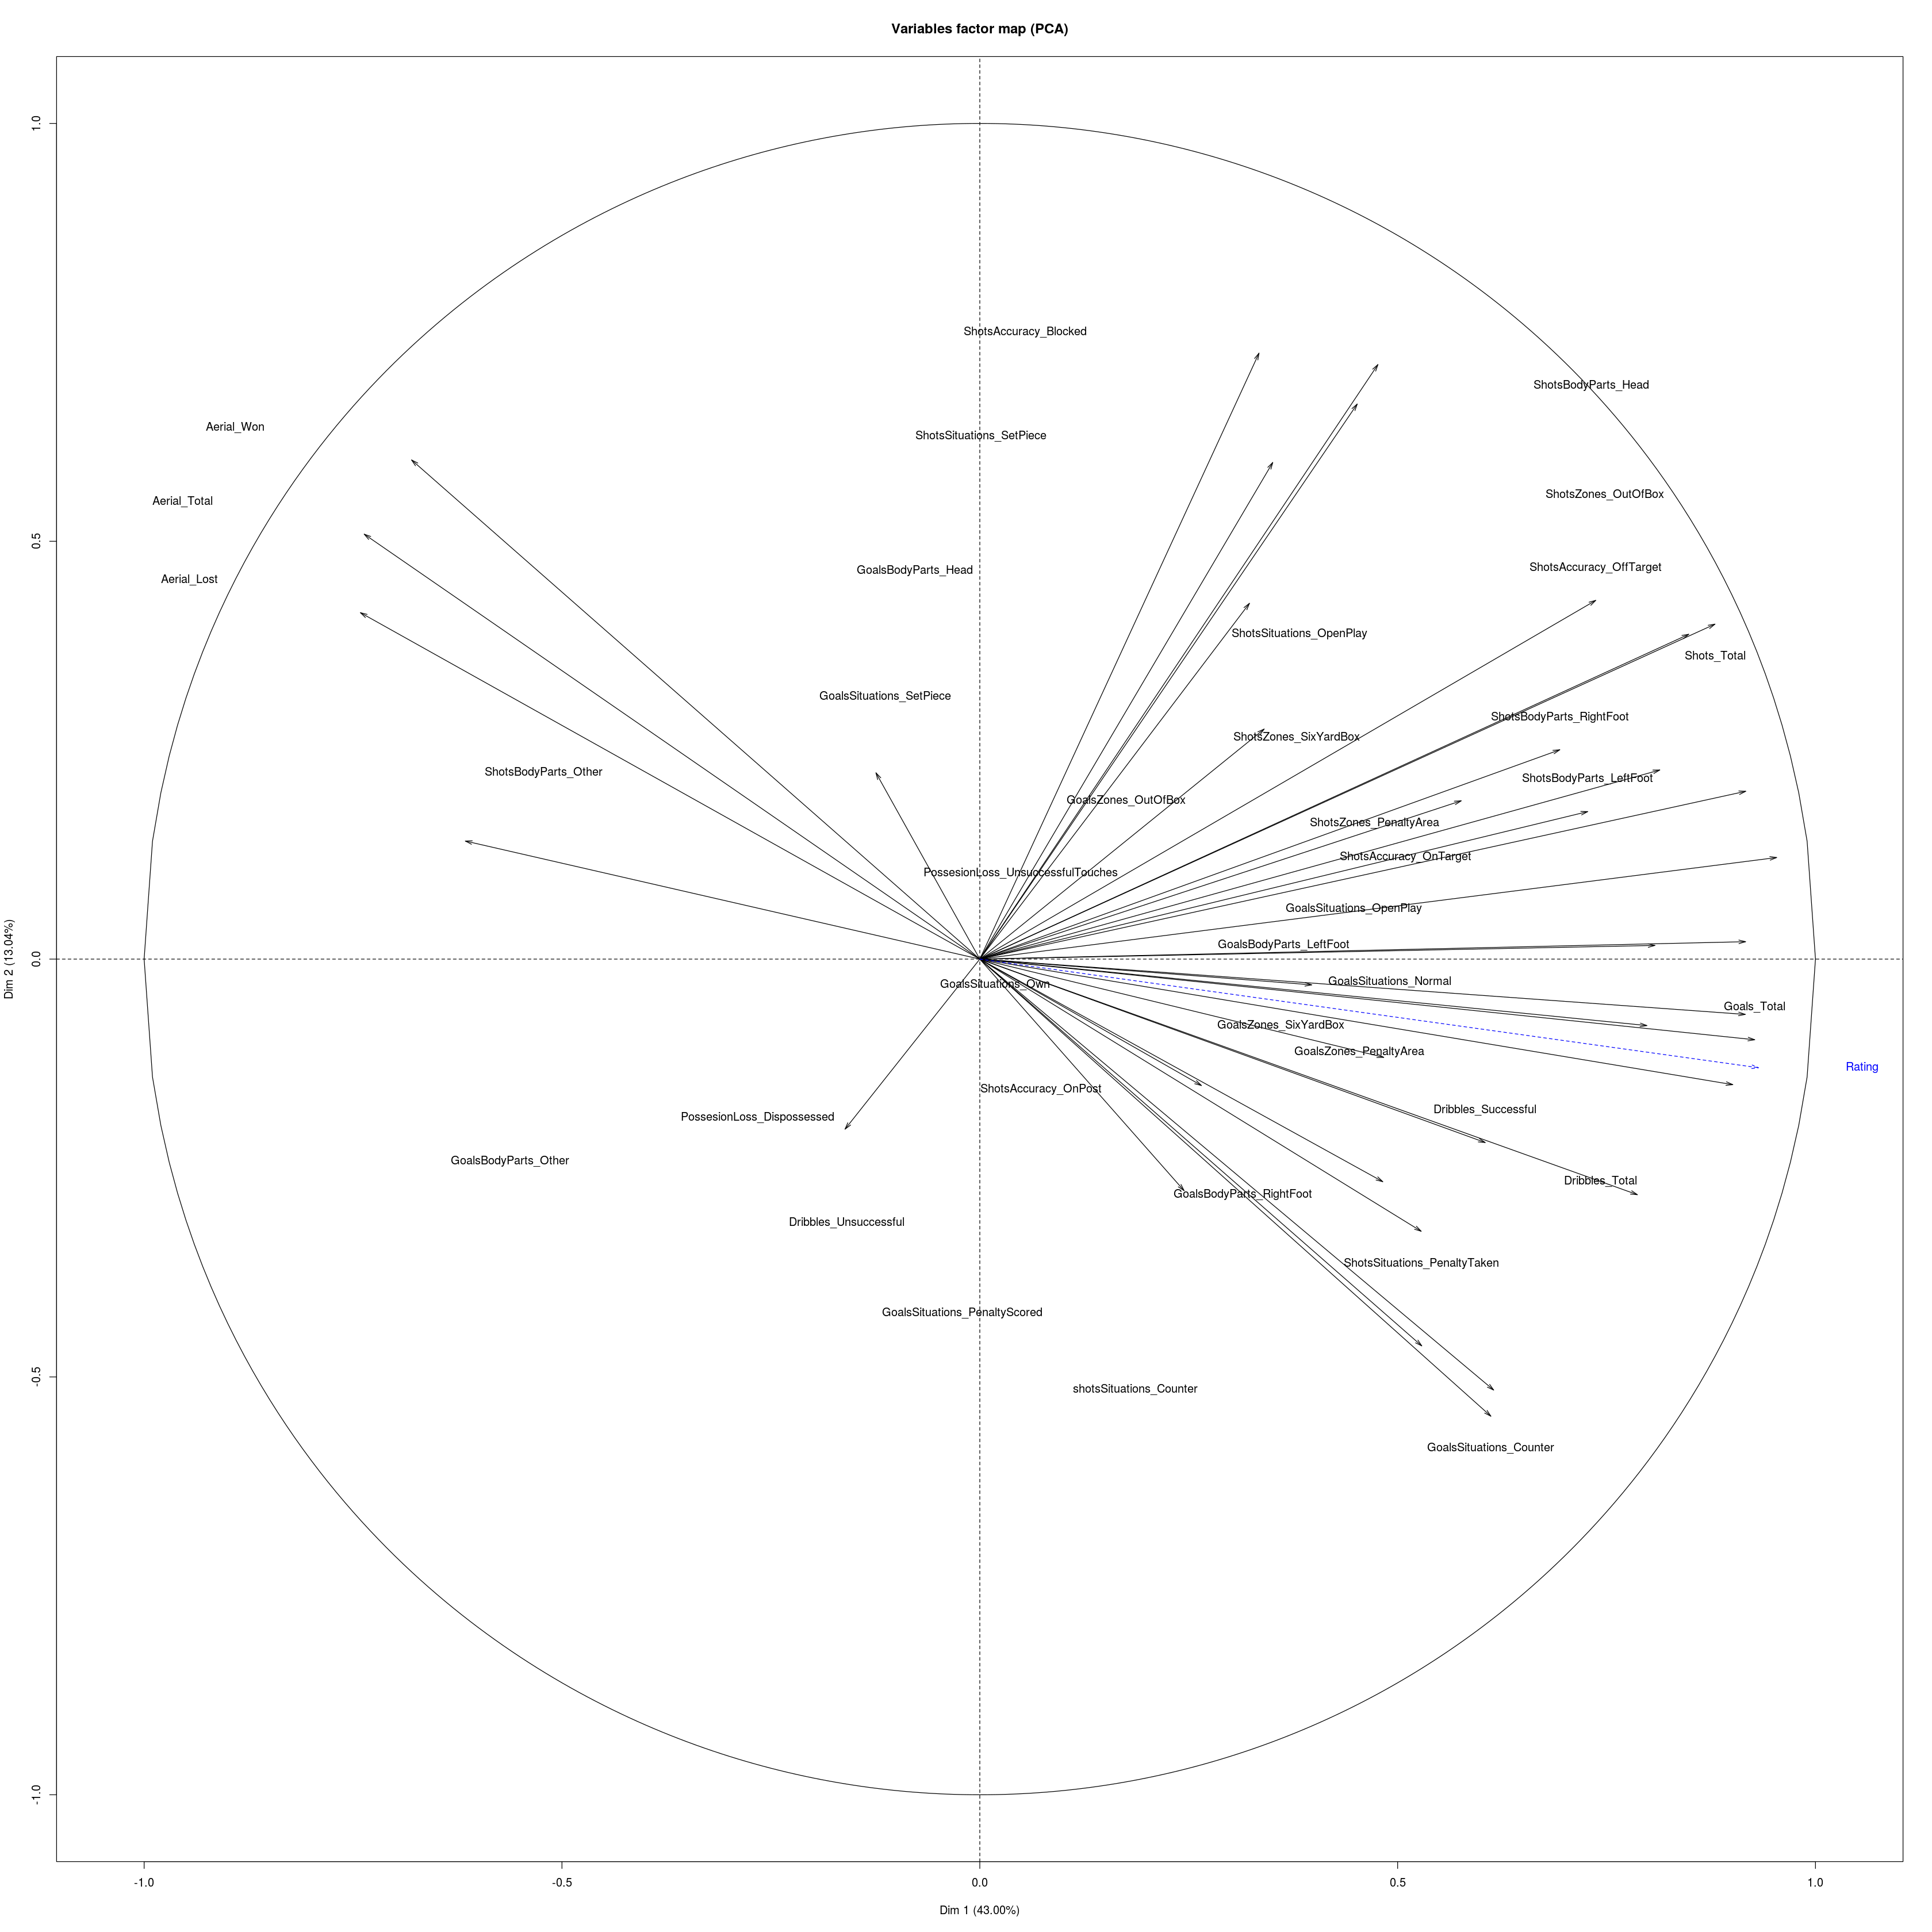

In [69]:
pca = PCA(of, scale.unit=T, graph=F, quanti.sup = 39)
plot(pca, axes = c(1,2), choix="var")

Cette ACP porte 60% de l'information sur ses deux premiers axes.  

Les variables `Goals_Total`, `GoalsSituations_OpenPlay`, `GoalsSituations_Normal`, `GoalsZones_PenaltyArea`, `GoalsBodyParts_RightFoot` sont corrélées positivement avec la variable `Rating`.  
Les variables liées aux duels aériens (`Aerial_Won`, `Aerial_Lost` et `Aerial_Total`) sont corrélées négativement à la variable `Rating`.  
Les variables `Dribbles_Unsuccessful`, `ShotsZones_OutOfBox`, `ShotsSituations_SetPiece`, `ShotsAccuracy_Blocked`, `ShotsBodyParts_Head` ne sont pas corrélées avec la variables `Rating`.

## CREATION D'UN DATAFRAME REGROUPANT LES VARIABLES QUI NOUS SEMBLENT LES PLUS PERTINANTES

In [77]:
data_complet = data.frame(def$Rating, def$Clearances_Total, def$Interception_Total, def$Fouls_Fouls, 
                  pas$PassesLength_Total, pas$KeyPassesType_Other, pas$KeyPassesLength_Short, 
                  pas$Assists_Other, pas$Assists_Total, pas$PassesLength_AccSP, pas$PassesType_AccFrK, 
                  pas$KeyPassesType_Freekick, pas$KeyPassesType_Throwin, of$ShotsZones_PenaltyArea, 
                  of$Shots_Total, of$ShotsSituations_OpenPlay, of$ShotsAccuracy_OnTarget, 
                  of$Goals_Total, of$GoalsSituations_OpenPlay, 
                  of$GoalsSituations_Normal, of$Aerial_Lost, of$Aerial_Total, of$Aerial_Won)

In [78]:
rownames(data_complet) =  rownames(def)

In [79]:
print.data.frame(data_complet)

                    def.Rating def.Clearances_Total def.Interception_Total
Paris Saint-Germain       7.05                 12.9                    9.0
Lyon                      6.91                 16.1                    9.6
Lille                     6.84                 17.9                   10.2
Montpellier               6.81                 18.6                   12.8
Saint-Etienne             6.78                 19.3                   11.6
Marseille                 6.78                 17.0                   10.6
Nice                      6.76                 19.3                   11.8
Nimes                     6.75                 20.4                   11.7
Rennes                    6.73                 19.2                   10.2
Strasbourg                6.73                 18.4                   11.3
Reims                     6.72                 21.5                   12.8
Nantes                    6.71                 20.7                   11.4
Angers                   

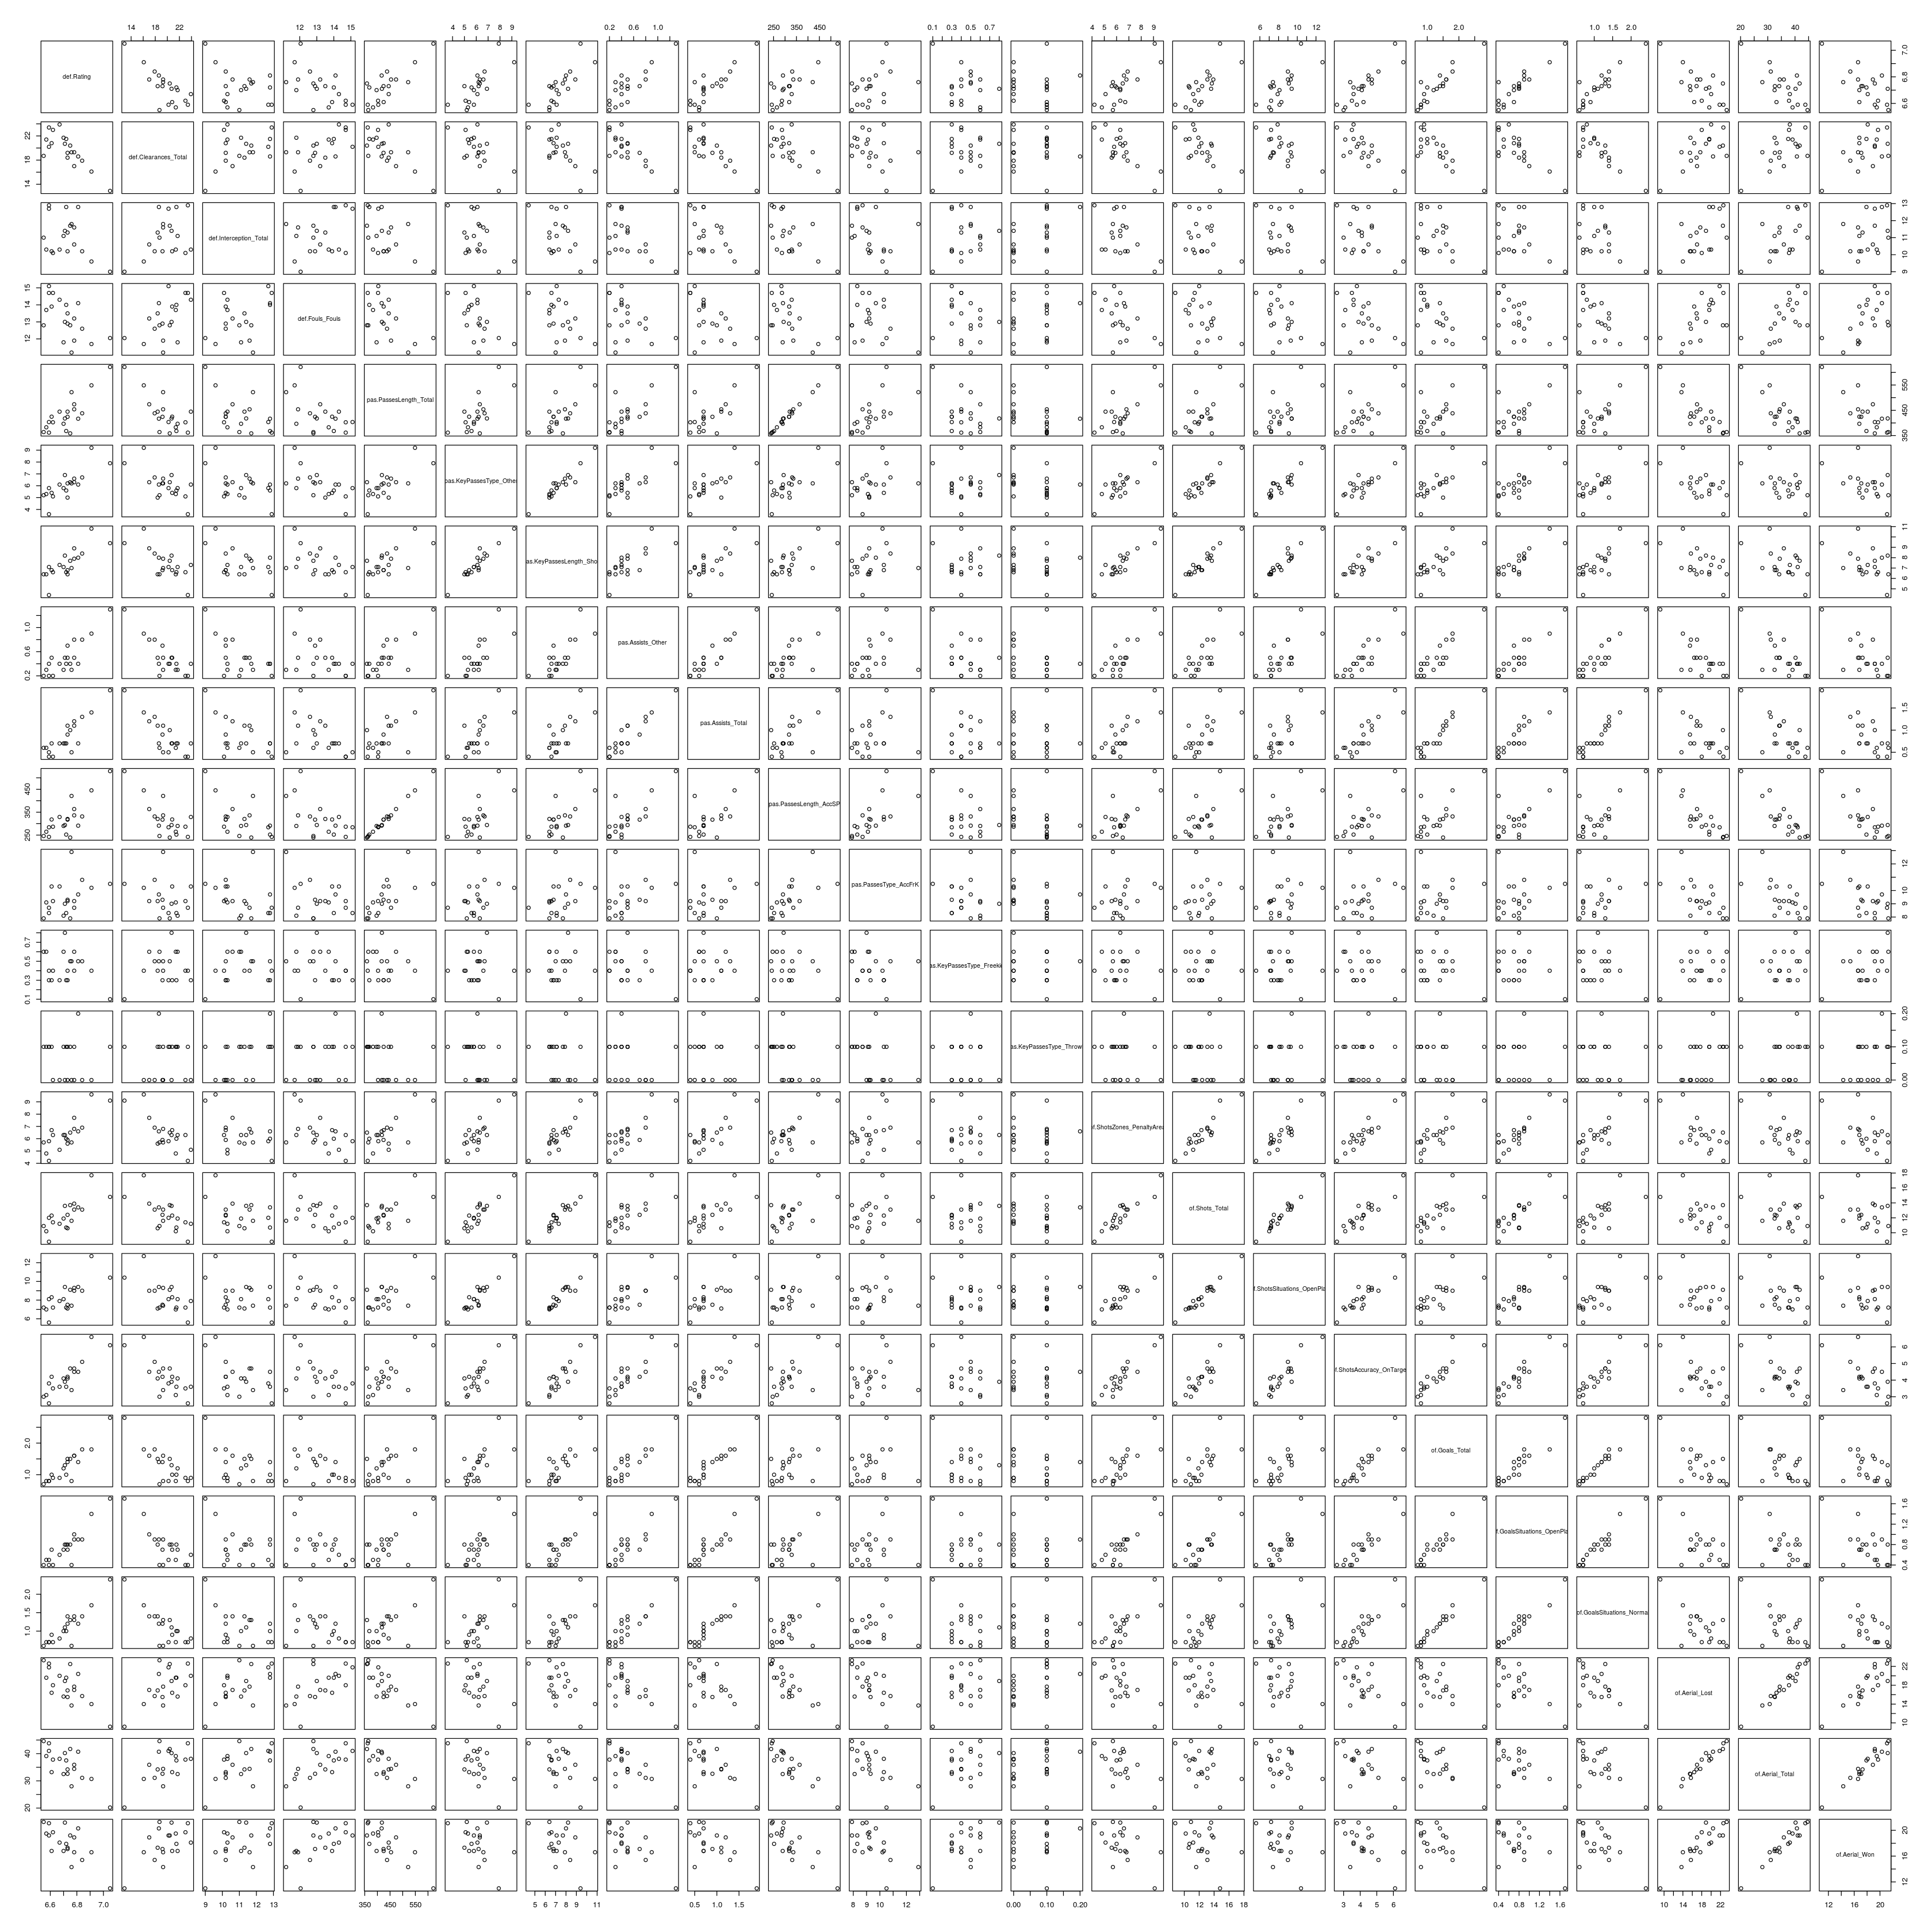

In [74]:
options(repr.plot.width=28, repr.plot.height=28)
pairs(data_complet)

De par le scatter plot, on peut voir que les variables `PassesLength_Total` et `PassesLength_AccSP` sont très corrélées linéairement. On peut penser qu'elles sont redondantes.

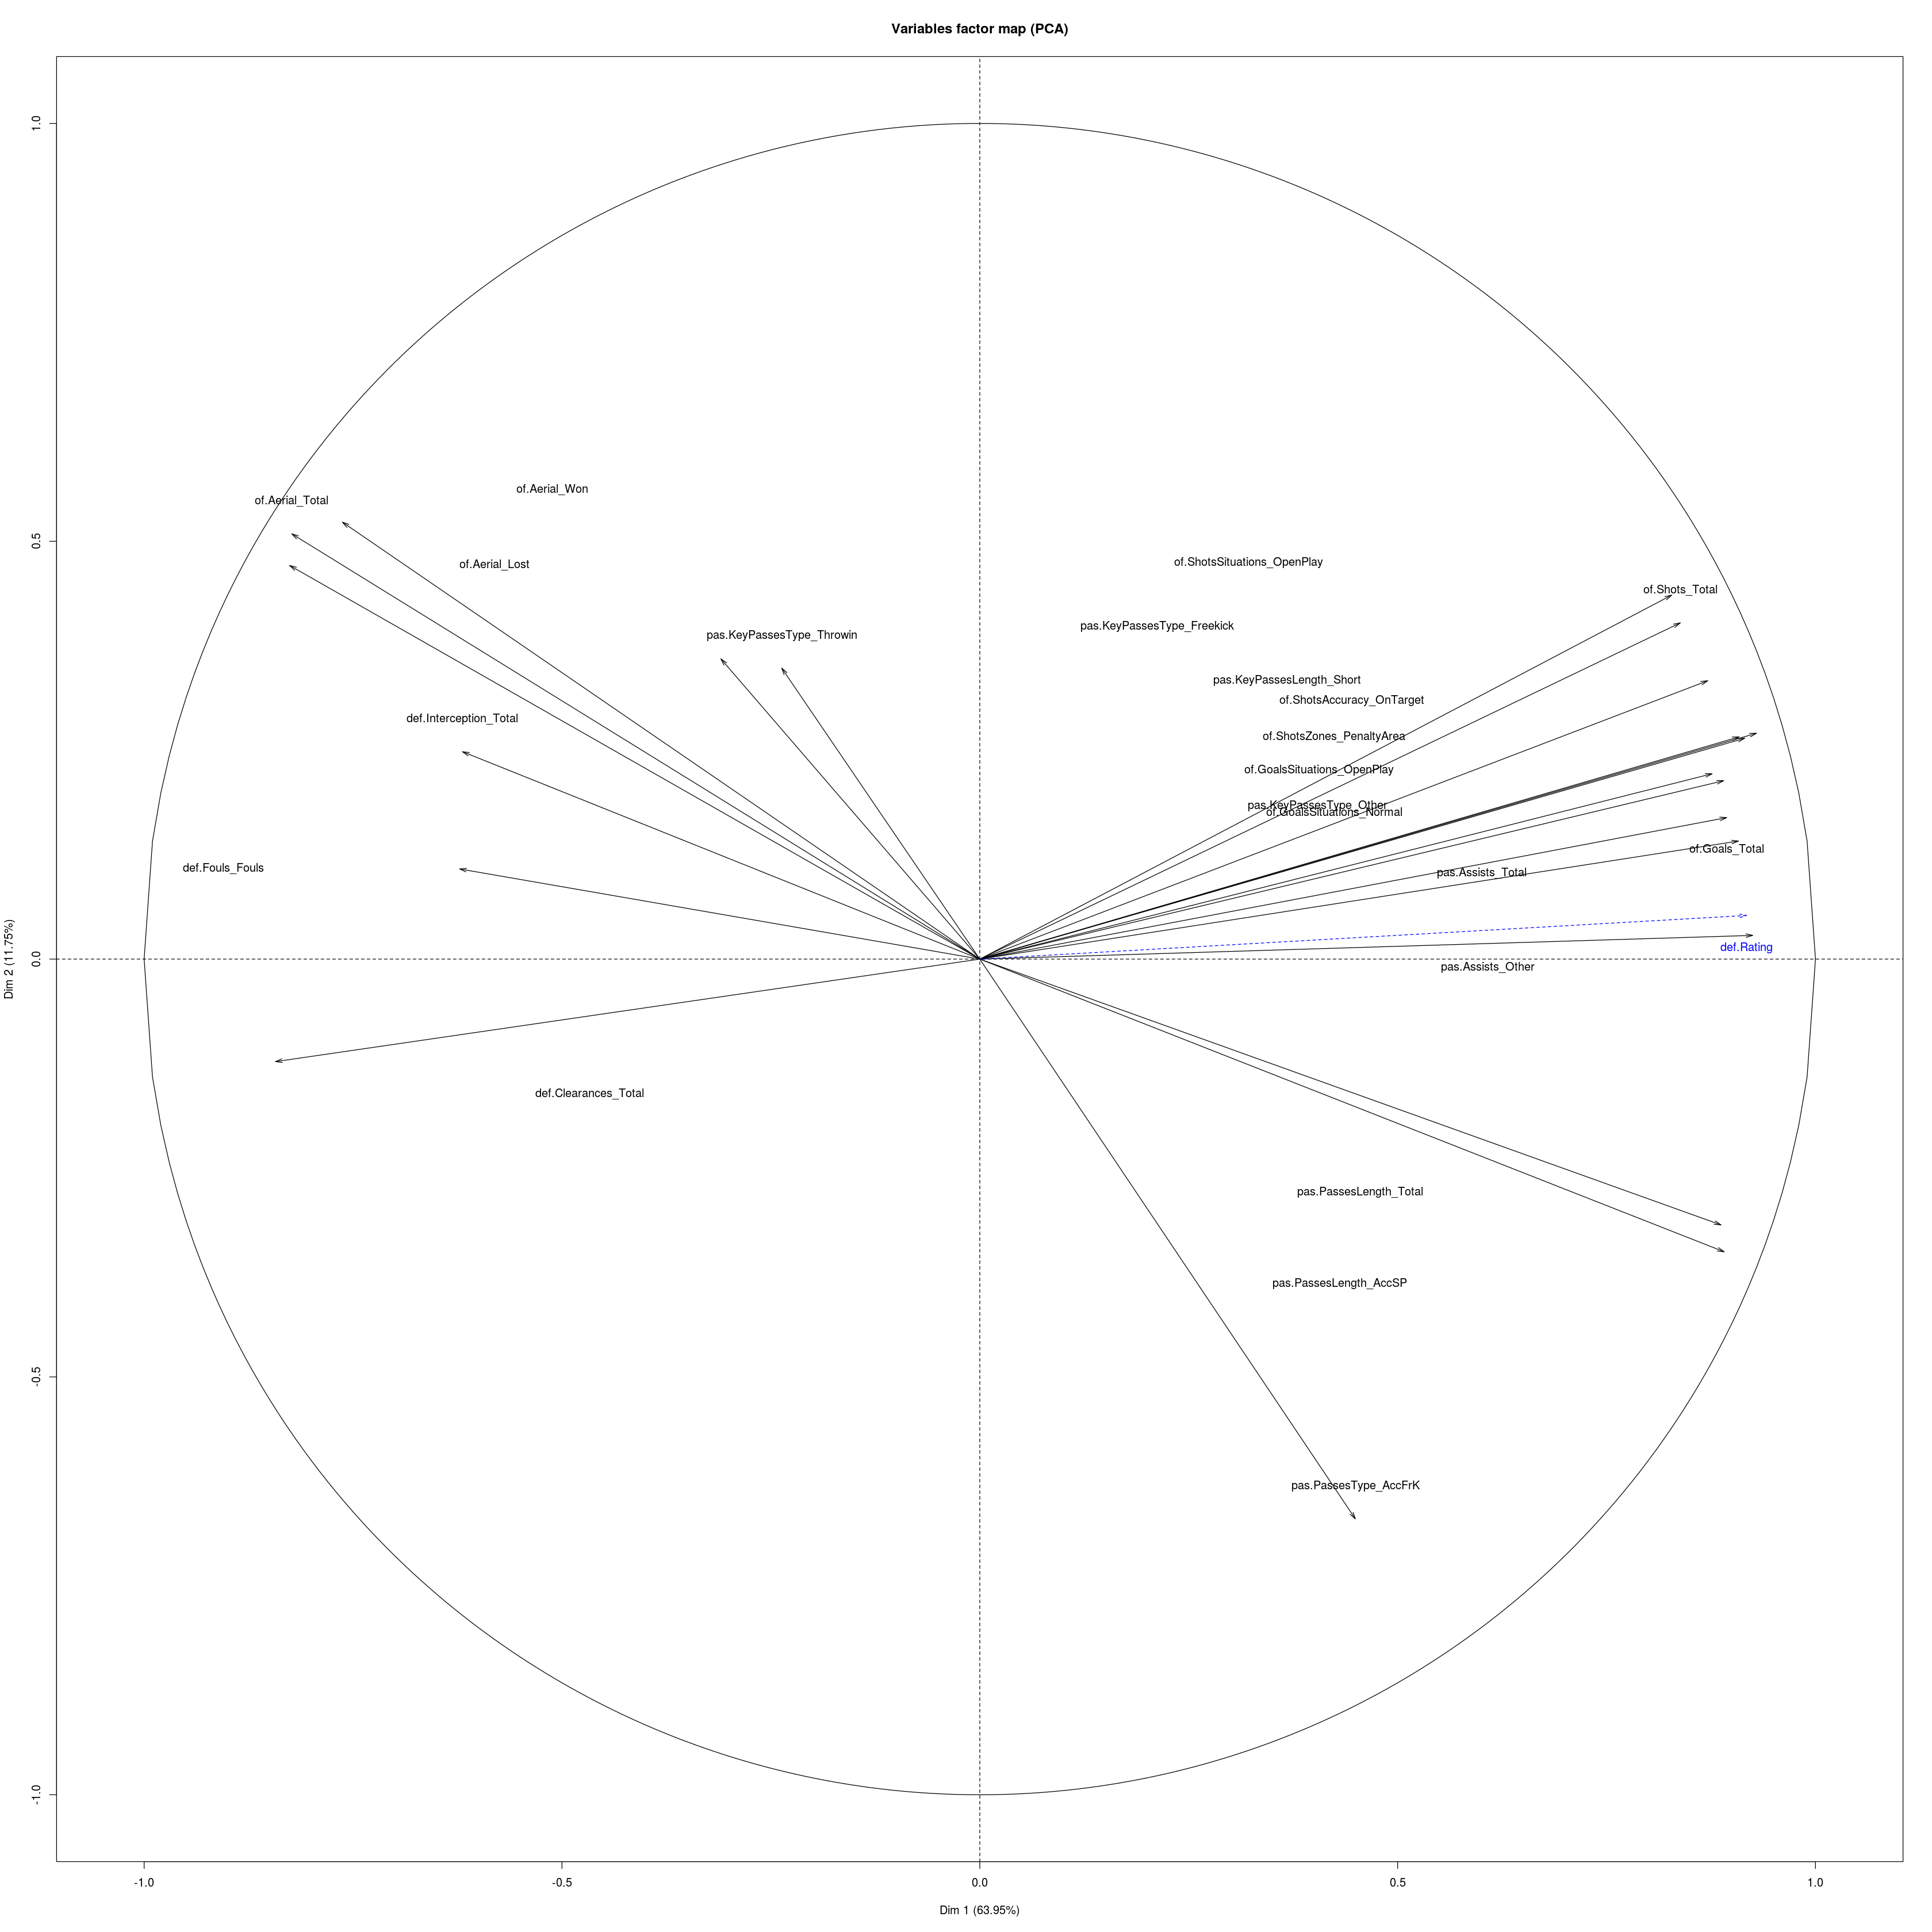

In [82]:
pca = PCA(data_complet, scale.unit=T, graph=F, quanti.sup = 1)
plot(pca, axes = c(1,2), choix="var")

Avec l'ACP, on peut confirmer que les variables `PassesLength_Total` et `PassesLength_AccSP` sont redondantes. On va faire le choix de ne garder que la variable `passesLength_Total` pour garder le plus d'informations possible.

In [90]:
data = data_complet[-c(10)]

In [89]:
pca = PCA(data, scale.unit=T, quanti.sup = 1)

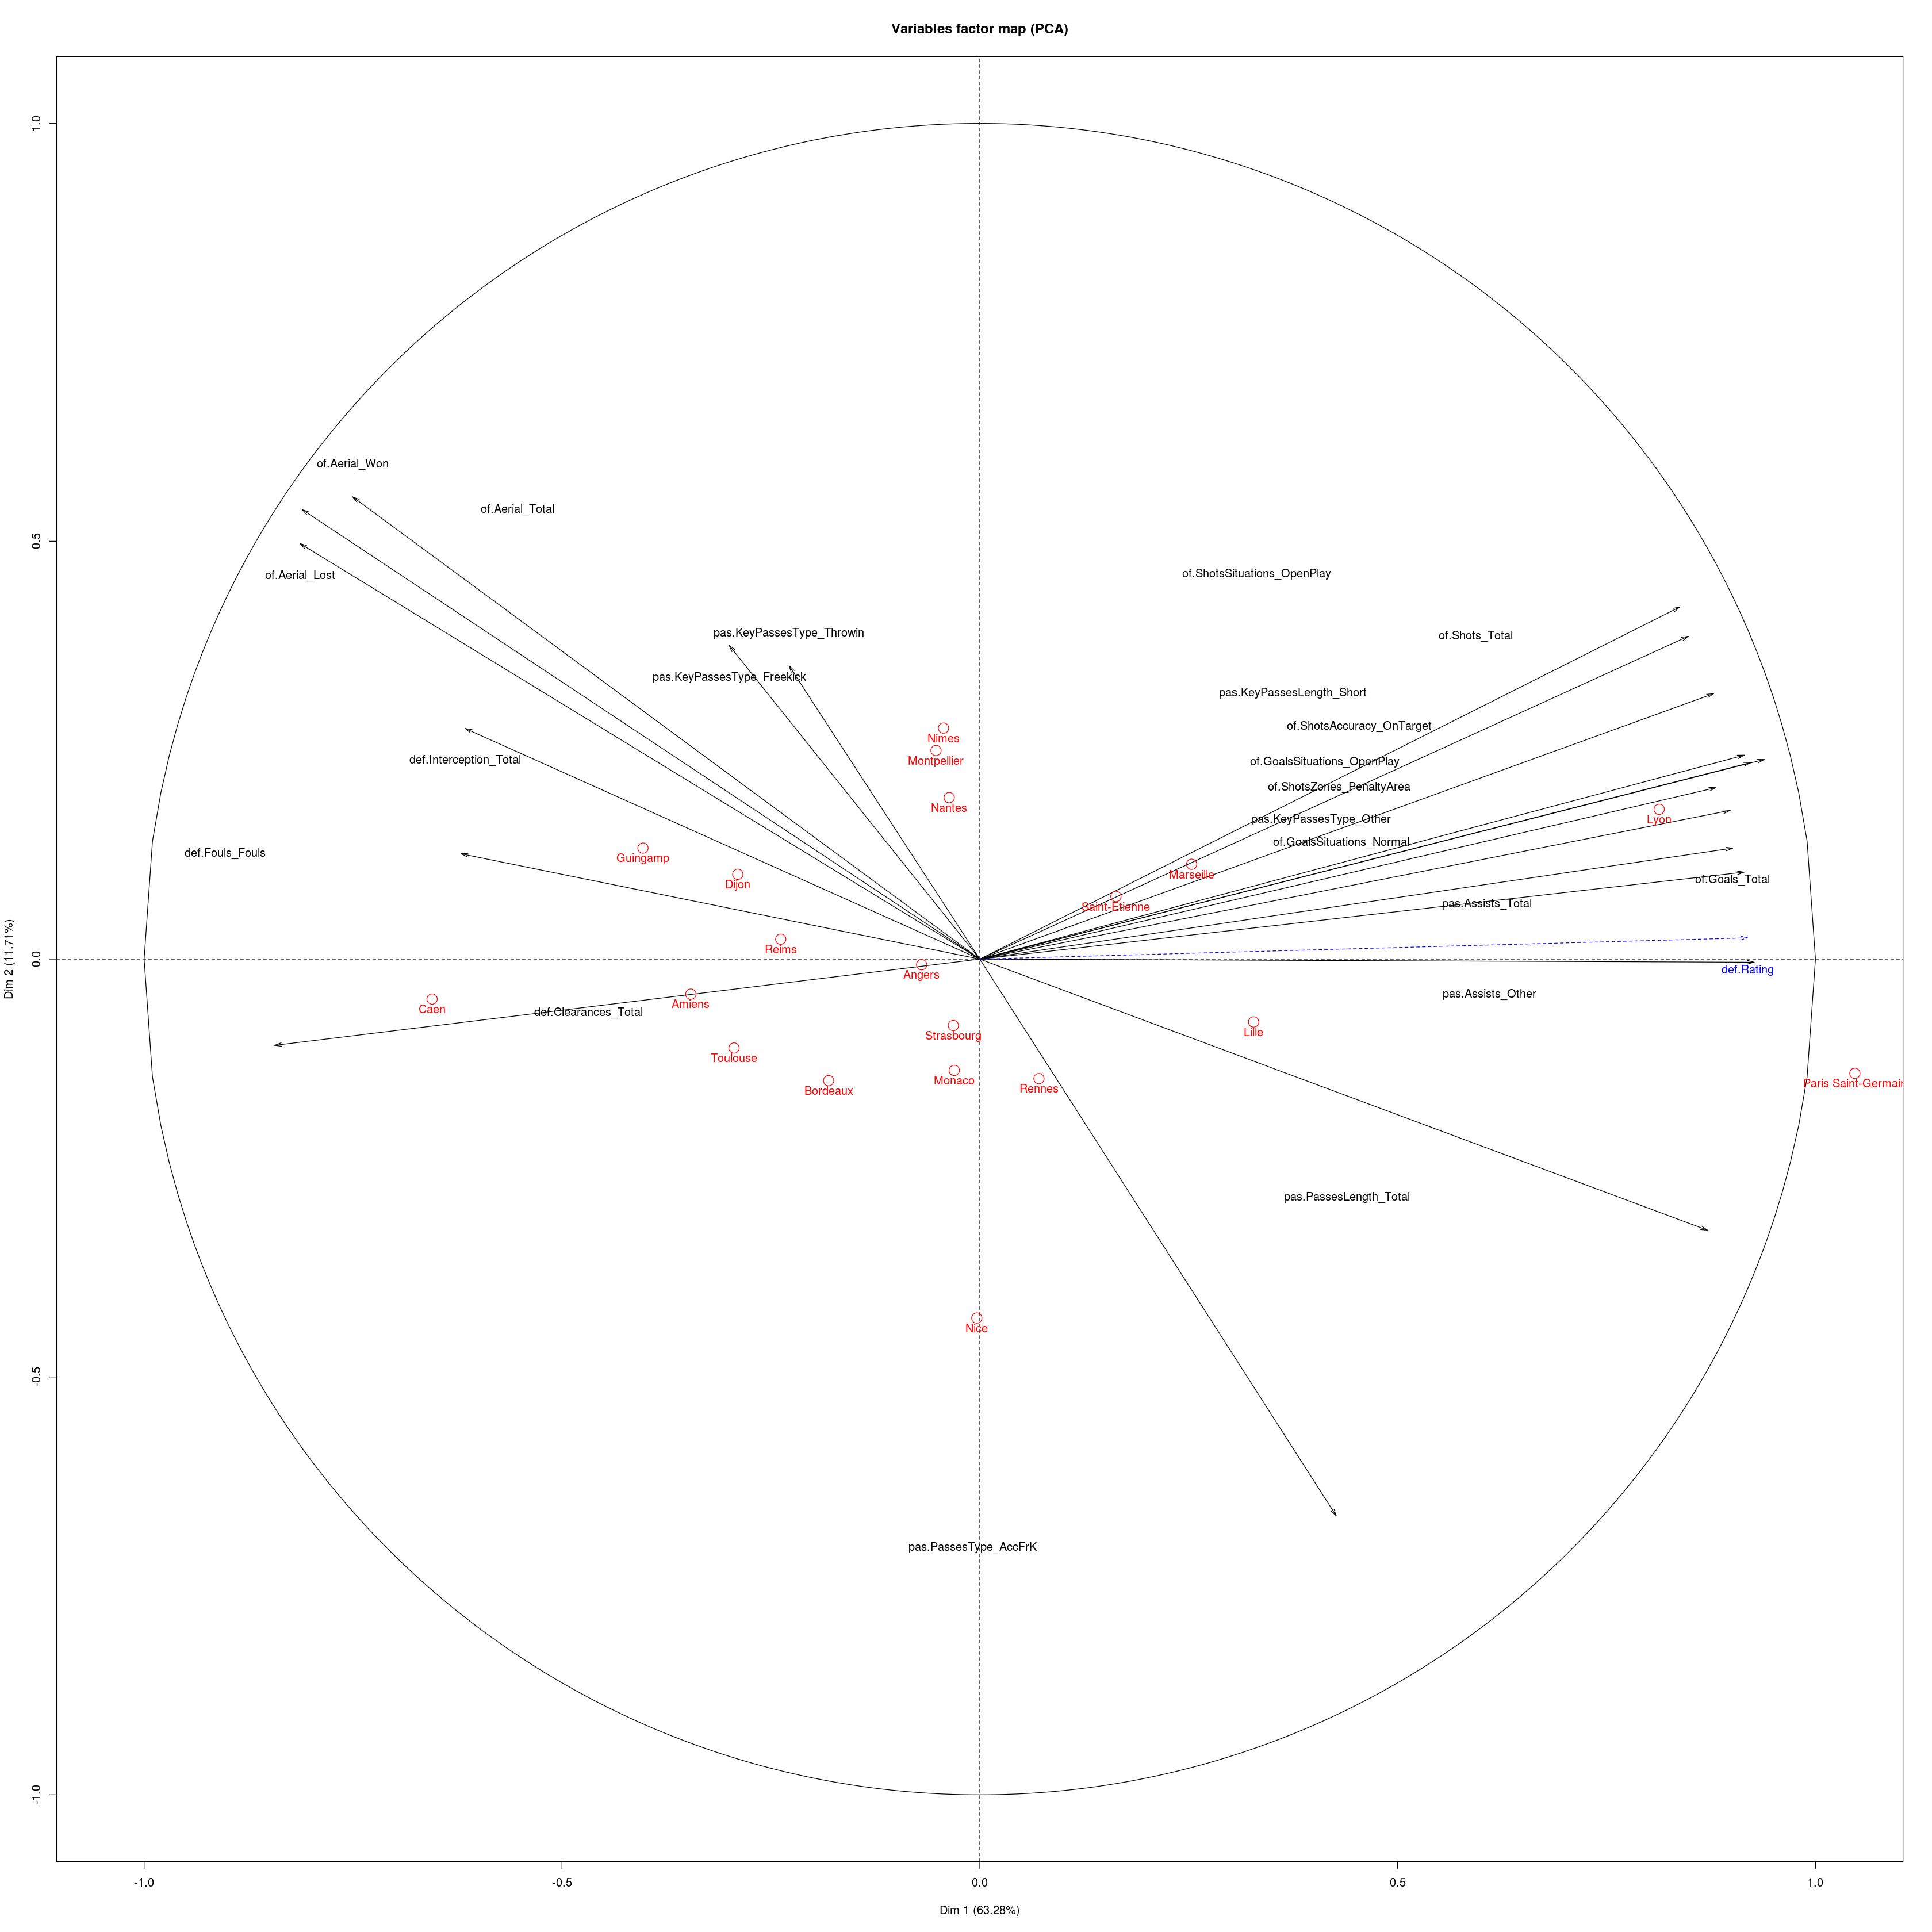

In [124]:
plot(pca, choix='var')
points(pca$ind$coord/9.5, col='red', cex=2)
text(pca$ind$coord/9.5, labels = rownames(pca$ind$coord), col = "red", pos=1)